# Libraries

In [1]:
#import libraries
import pandas as pd #read csv files
import numpy as np #numeric date(mean)
import seaborn as sns #visualization
from matplotlib import pyplot as plt #plot


In [2]:
#import earth engine
import ee
#create interactive map
import geemap
Map= geemap.Map()



In [3]:
lake = ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALTM_ALAP_Sta_coordinates')\
    .filter(ee.Filter.Or(
        ee.Filter.eq('Program', 'ALTM'),
        ee.Filter.eq('Program', 'ALAP_ALTM')
    ))

In [4]:
Map.addLayer(lake)
Map.centerObject(lake, 16)
Map

Map(center=[43.91421845953893, -74.59151347131878], controls=(WidgetControl(options=['position', 'transparent_…

In [5]:
# Get the size (count) of the filtered collection
collection_size = lake.size()

# Print the size
print("Size of the lake feature collection:", collection_size.getInfo())

Size of the lake feature collection: 50


In [6]:
import ee

# Initialize Earth Engine
ee.Initialize()

# Load the feature collection (replace with your collection)
lake = ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALTM_ALAP_Sta_coordinates')\
    .filter(ee.Filter.Or(
        ee.Filter.eq('Program', 'ALTM'),
        ee.Filter.eq('Program', 'ALAP_ALTM')
    ))


# Get the size (count) of the filtered collection
collection_size = lake.size()

# Get the "Name" property values as a list
name_list = lake.aggregate_array('Name')

# Print the size
print("Size of the lake feature collection:", collection_size.getInfo())

# Print the "Name" property values
print("Name values:", name_list.getInfo())


Size of the lake feature collection: 50
Name values: ['Barnes Lake', 'Big Hope Pond', 'Brook Trout Lake', 'Constable Pond', 'Grass Pond (3)', 'Little Echo Pond', 'Loon Hollow Pond', 'Otter Lake', 'Sochia Pond', 'South Lake (East Branch)', 'Squash Pond', 'Sunday Pond', 'West Pond', 'Willis Lake', 'Windfall Pond', 'Middle Pond*', 'Carry Pond', 'Little Clear Pond', 'Little Hope Pond*', 'Heart Lake', 'Limekiln Lake', 'Avalanche Lake', 'Cascade Lake', 'Grass Pond', 'Little Simon Pond*', 'Long Pond', 'Nate Pond*', 'Raquette Lake Reservoir*', 'Sagamore Lake*', 'Lake Rondaxe', 'Dart Lake', 'G Lake', 'Indian Lake', 'Jockeybush Lake', 'Lake Colden', 'Lost Pond*', 'Middle Branch Lake', 'Middle Settlement Lake', 'North Lake', 'Queer Lake', 'Squaw Lake', 'Willys Lake', 'Woods Lake', 'Owen Pond', 'Copperas Pond', 'Arbutus Pond', 'Moss Lake', 'Big Moose Lake', 'Black Pond', 'Clear Pond']


# Get In-Situ Data FROM ALTM

In [7]:
import pandas as pd


# Read the Excel file
data_excel = pd.read_excel("LTM_Data_2023_3_9 (2).xlsx", usecols=['DOC_MG_L', 'SITE_ID', 'DATE_SMP', 'SAMPLE_LOCATION'])
data_excel_site = pd.read_excel("Site_Information_2022_8_1 (2).xlsx", usecols=['SITE_ID', 'PROGRAM_ID', 'SITE_NAME','LAKE_DEPTH_MEAN'])

data_second_sheet_COORD = pd.read_excel("ALTM-50-stations (1).xlsx",
                                 sheet_name='updated station coordinates', usecols=['SITE_ID', 'LATDD', 'LONDD','LATDD_CENT','LONDD_CENT','SITE_NAME'])

# Merge the two DataFrames based on the common column 'SITE_ID'
merged_data_excel = pd.merge(data_excel, data_excel_site, on=['SITE_ID'])
merged_data_combined = pd.merge(merged_data_excel, data_second_sheet_COORD, on=['SITE_ID', 'SITE_NAME'])

data_modified = merged_data_combined.drop(columns=['SAMPLE_LOCATION'])
data_modified = data_modified[merged_data_combined['PROGRAM_ID'] == 'LTM_ALTM']

#pd.set_option('display.max_rows', None)
# Display the merged DataFrame
(data_modified)


,SITE_ID,DATE_SMP,DOC_MG_L,PROGRAM_ID,SITE_NAME,LAKE_DEPTH_MEAN,LATDD,LONDD,LATDD_CENT,LONDD_CENT
0,040850,1997-09-22,3.100000,LTM_ALTM,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
2,040850,1995-03-02,3.031000,LTM_ALTM,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
4,040850,1996-08-19,3.595000,LTM_ALTM,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
6,040850,2003-11-06,4.232000,LTM_ALTM,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
8,040850,2005-07-11,3.344000,LTM_ALTM,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
...,...,...,...,...,...,...,...,...,...,...
17863,1A3-048,2011-05-18,4.283944,LTM_ALTM,Grass Pond,1.5,43.69066,-75.06462,43.69207,-75.06172
17864,1A3-048,2015-06-10,5.509394,LTM_ALTM,Grass Pond,1.5,43.69066,-75.06462,43.69207,-75.06172
17865,1A3-048,2016-07-14,4.884900,LTM_ALTM,Grass Pond,1.5,43.69066,-75.06462,43.69207,-75.06172
17866,1A3-048,2016-09-15,6.344000,LTM_ALTM,Grass Pond,1.5,43.69066,-75.06462,43.69207,-75.06172


In [8]:
selected_columns= data_modified[["SITE_NAME","LAKE_DEPTH_MEAN"]]
selected_columns

,SITE_NAME,LAKE_DEPTH_MEAN
0,Squaw Lake,3.4
2,Squaw Lake,3.4
4,Squaw Lake,3.4
6,Squaw Lake,3.4
8,Squaw Lake,3.4
...,...,...
17863,Grass Pond,1.5
17864,Grass Pond,1.5
17865,Grass Pond,1.5
17866,Grass Pond,1.5


In [9]:
null_depth_value= data_modified[data_modified["LAKE_DEPTH_MEAN"].isnull()]["SITE_NAME"]
print(null_depth_value)
null_values= null_depth_value.drop_duplicates()
print(null_values)

17000    Otter Lake
17001    Otter Lake
17002    Otter Lake
17003    Otter Lake
17004    Otter Lake
            ...    
17280    Otter Lake
17281    Otter Lake
17282    Otter Lake
17283    Otter Lake
17284    Otter Lake
Name: SITE_NAME, Length: 285, dtype: object
17000    Otter Lake
Name: SITE_NAME, dtype: object


In [10]:
selected_columns= data_modified[["SITE_NAME","LAKE_DEPTH_MEAN"]]
selected_columns= selected_columns.dropna(subset="LAKE_DEPTH_MEAN")
selected_columns

,SITE_NAME,LAKE_DEPTH_MEAN
0,Squaw Lake,3.4
2,Squaw Lake,3.4
4,Squaw Lake,3.4
6,Squaw Lake,3.4
8,Squaw Lake,3.4
...,...,...
17863,Grass Pond,1.5
17864,Grass Pond,1.5
17865,Grass Pond,1.5
17866,Grass Pond,1.5


In [11]:
import pandas as pd


# Drop duplicates based on the "SITE_NAME" column
selected_columns = selected_columns.drop_duplicates(subset="SITE_NAME")

selected_columns


,SITE_NAME,LAKE_DEPTH_MEAN
0,Squaw Lake,3.4
671,Willys Lake,4.9
1329,South Lake (East Branch),8.3
2028,Arbutus Pond,2.8
2462,Heart Lake,5.1
2903,Big Moose Lake,6.8
3346,Dart Lake,7.3
3767,Little Echo Pond,2.9
4209,Moss Lake,5.7
4652,Lake Rondaxe,3.0


In [12]:
import pandas as pd

# Assuming 'selected_columns' is your DataFrame
# Drop duplicates based on the "SITE_NAME" column
selected_columns = selected_columns.drop_duplicates(subset="SITE_NAME")

# Get the number of rows (size)
collection_size = selected_columns.shape[0]

# Print the size
print("Size of the DataFrame:", collection_size)


Size of the DataFrame: 49


In [13]:
import pandas as pd

# Assuming 'selected_columns' is your DataFrame
# Drop duplicates based on the "SITE_NAME" column
selected_columns = selected_columns.drop_duplicates(subset="SITE_NAME")

# Get the unique "SITE_NAME" values in an array
site_names_array = selected_columns["SITE_NAME"].unique()

# Print the size
print("Size of the DataFrame:", collection_size)

# Print the "SITE_NAME" values in an array
print("Unique SITE_NAME values:", site_names_array)


Size of the DataFrame: 49
Unique SITE_NAME values: ['Squaw Lake' 'Willys Lake' 'South Lake (East Branch)' 'Arbutus Pond'
 'Heart Lake' 'Big Moose Lake' 'Dart Lake' 'Little Echo Pond' 'Moss Lake'
 'Lake Rondaxe' 'Clear Pond' 'Little Hope Pond' 'Big Hope Pond'
 'East Copperas Pond' 'Sunday Pond' 'Sochia Pond' 'Grass Pond (3)'
 'Little Clear Pond' 'Loon Hollow Pond' 'Woods Lake'
 'Middle Settlement Lake' 'Middle Branch Lake' 'Limekiln Lake'
 'Indian Lake' 'Brook Trout Lake' 'Lost Pond' 'North Lake' 'Willis Lake'
 'Long Pond' 'Carry Pond' 'Lake Colden' 'Avalanche Lake'
 'Little Simon Pond' 'Raquette Lake Reservoir' 'G Lake' 'Constable Pond'
 'Middle Pond' 'Sagamore Lake' 'Black Pond' 'Windfall Pond' 'Queer Lake'
 'Cascade Lake' 'Squash Pond' 'West Pond' 'Owen Pond' 'Jockeybush Lake'
 'Barnes Lake' 'Nate Pond' 'Grass Pond']


# POLYGON FUNCTION

In [14]:
# Function to create a five-sided polygon around the latitude and longitude
import ee
import geemap

# Function to create a five-sided polygon around the latitude and longitude
def create_lake_polygon(lat, lon):
    # Assuming each pixel is approximately 20 meters in size
    buffer_distance_meters = 3 * 20

    
    # Convert buffer distance from meters to degrees (approximate conversion)
    buffer_distance_degrees = buffer_distance_meters / 111320.0

    # Define the coordinates of the five vertices of the polygon
    coordinates = [
        [lon, lat + buffer_distance_degrees],
        [lon + buffer_distance_degrees, lat + buffer_distance_degrees / 2],
        [lon + buffer_distance_degrees / 2, lat - buffer_distance_degrees / 2],
        [lon - buffer_distance_degrees / 2, lat - buffer_distance_degrees / 2],
        [lon - buffer_distance_degrees, lat + buffer_distance_degrees / 2]
    ]

    # Create the polygon geometry
    polygon = ee.Geometry.Polygon(coordinates)

    return polygon

# Get Band Reflectance Values for 50 lakes with Dates and Lake Label

In [15]:
import ee
import geemap
import pandas as pd

# Authenticate and initialize the Earth Engine API
ee.Initialize()

# # Create a list of lake names
# lake_names = [
#     'Little Hope Pond', 'Big Hope Pond', 'East Copperas Pond', 'Sunday Pond', 'Sochia Pond',
#     'Grass Pond (3)', 'Little Clear Pond', 'Loon Hollow Pond', 'Willys Lake', 'Woods Lake',
#     'Middle Settlement Lake', 'Middle Branch Lake', 'Limekiln Lake', 'Squaw Lake', 'Indian Lake',
#     'Brook Trout Lake', 'Lost Pond', 'North Lake', 'Willis Lake', 'Long Pond', 'Carry Pond',
#     'Lake Colden', 'Avalanche Lake', 'Little Simon Pond', 'Raquette Lake Reservoir', 'G Lake',
#     'Constable Pond', 'Middle Pond', 'Arbutus Pond', 'Sagamore Lake', 'Black Pond', 'Windfall Pond',
#     'Queer Lake', 'Heart Lake', 'Big Moose Lake', 'Cascade Lake', 'Dart Lake', 'Little Echo Pond',
#     'Moss Lake', 'Lake Rondaxe', 'Squash Pond', 'West Pond', 'Owen Pond', 'Jockeybush Lake',
#     'Barnes Lake', 'Clear Pond', 'Otter Lake', 'Nate Pond', 'Grass Pond', 'South Lake (East Branch)'
# ]


lake_names = ['Barnes Lake', 'Big Hope Pond', 'Brook Trout Lake', 'Constable Pond', 'Grass Pond (3)', 'Little Echo Pond', 
 'Loon Hollow Pond', 'Otter Lake', 'Sochia Pond', 'South Lake (East Branch)', 'Squash Pond', 'Sunday Pond', 
 'West Pond', 'Willis Lake', 'Windfall Pond', 'Middle Pond*', 'Carry Pond', 'Little Clear Pond', 'Little Hope Pond*', 
 'Heart Lake', 'Limekiln Lake', 'Avalanche Lake', 'Cascade Lake', 'Grass Pond', 'Little Simon Pond*', 'Long Pond', 
 'Nate Pond*', 'Raquette Lake Reservoir*', 'Sagamore Lake*', 'Lake Rondaxe', 'Dart Lake', 'G Lake', 'Indian Lake', 
 'Jockeybush Lake', 'Lake Colden', 'Lost Pond*', 'Middle Branch Lake', 'Middle Settlement Lake', 'North Lake', 
 'Queer Lake', 'Squaw Lake', 'Willys Lake', 'Woods Lake', 'Owen Pond', 'Copperas Pond', 'Arbutus Pond', 'Moss Lake', 
 'Big Moose Lake', 'Black Pond', 'Clear Pond']

# Define the Landsat 5 bands and their corresponding standard names
LC5_BANDS = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'ST_B6', 'QA_PIXEL']
STD_NAMES = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp', 'QA']

# Define a function to mask clouds and cloud shadows from Landsat 5 surface reflectance imagery
def maskL457sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)

    qa_values_to_filter = [5440, 5442, 5696, 13664]

    mask = image.select('QA_PIXEL').eq(qa_values_to_filter[0])
    for qa_value in qa_values_to_filter[1:]:
        mask = mask.Or(image.select('QA_PIXEL').eq(qa_value))

    filtered_image = image.updateMask(mask)

    opticalBands = filtered_image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = filtered_image.select('ST_B6').multiply(0.00341802).add(-124.15)
    return filtered_image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask)

# Define a function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake, scale=30).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# Initialize an empty list to store the dataframes for each lake
dfs = []

# Create a dictionary to map each lake name to a numerical label
lake_name_to_label = {lake_name: i for i, lake_name in enumerate(lake_names)}

# Loop through each lake name and retrieve Landsat 5 imagery for that lake
for SITE_NAME in lake_names:
    # Retrieve the lake using the filter
    lake = ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALTM_ALAP_Sta_coordinates')\
        .filter(ee.Filter.Or(
            ee.Filter.eq('Program', 'ALTM'),
            ee.Filter.eq('Program', 'ALAP_ALTM')
        ))\
         .filter(ee.Filter.eq('Name', SITE_NAME))

    # # Check if any features were returned by the filter
    # if lake.size().getInfo() > 0:
        # Get the latitude and longitude of the station point
    lat = ee.Number(lake.first().geometry().coordinates().get(1)).getInfo()
    lon = ee.Number(lake.first().geometry().coordinates().get(0)).getInfo()

    # Create a polygon around the station point using the latitude and longitude
    lake_polygon = ee.Geometry.Point(lon, lat).buffer(1000)

    # Retrieve Landsat 5 imagery for the specific lake
    l5 = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
        .filter(ee.Filter.calendarRange(5, 12, 'month')) \
        .filter(ee.Filter.calendarRange(1985, 2011, 'year')) \
        .filterBounds(lake_polygon) \
        .filter(ee.Filter.lt('CLOUD_COVER', 25)) \
        .map(maskL457sr) \
        .select(LC5_BANDS, STD_NAMES)

    # Map the reflectance function over the Landsat 5 ImageCollection for the specific lake
    map_reflectance = l5.map(lambda img: reflectance(img, lake_polygon))

    # Reduce the mapped image collection to get reflectance values for the specific lake
    list_reflectance = map_reflectance.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

    # Convert the results to a pandas DataFrame
    df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
    df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
    df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
    df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v for k, v in x.items() if v is not None})

    # Unpack the 'reflectance' dictionary and create separate columns for each band
    df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
                                df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)

    # Add a new column for the lake name
    df_reflectance['SITE_NAME'] = SITE_NAME

    # Add a new column for the lake label (numeric representation)
    df_reflectance['LAKE_LABEL'] = lake_name_to_label[SITE_NAME]

    # Add the DataFrame to the list
    dfs.append(df_reflectance)

# Concatenate all DataFrames into a single DataFrame
df_all_lakes = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by 'DATE_SMP' in ascending order
df_all_lakes.sort_values(by='DATE_SMP', inplace=True)


In [16]:
df_all_lakes['SITE_NAME']

10620            Clear Pond
7483            Lake Colden
112           Big Hope Pond
2281            Sunday Pond
1025       Little Echo Pond
                ...        
3435           Middle Pond*
1576             Otter Lake
2923            Willis Lake
7939     Middle Branch Lake
10820            Clear Pond
Name: SITE_NAME, Length: 10821, dtype: object

In [17]:
import pandas as pd

# Assuming 'df_all_lakes' is your DataFrame

# Remove the asterisk (*) from the 'SITE_NAME' column
df_all_lakes['SITE_NAME'] = df_all_lakes['SITE_NAME'].str.replace('*', '')

# Print the updated 'df_all_lakes' DataFrame
df_all_lakes['SITE_NAME'] 

10620            Clear Pond
7483            Lake Colden
112           Big Hope Pond
2281            Sunday Pond
1025       Little Echo Pond
                ...        
3435            Middle Pond
1576             Otter Lake
2923            Willis Lake
7939     Middle Branch Lake
10820            Clear Pond
Name: SITE_NAME, Length: 10821, dtype: object

In [18]:
# Remove duplicate rows based on the 'SITE_NAME' column
df_all_lakes_unique = df_all_lakes.drop_duplicates(subset=['SITE_NAME'])

# Now, df_all_lakes_unique contains unique rows based on the 'SITE_NAME' column.
df_all_lakes_unique

,DATE_SMP,QA,blue,green,nir,red,swir1,swir2,temp,SITE_NAME,LAKE_LABEL
10620,1985-06-04,5440.370949,0.045259,0.068343,0.241871,0.054055,0.118311,0.059800,1.893274,Clear Pond,49
7483,1985-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lake Colden,34
112,1985-06-04,5441.048676,0.049934,0.076695,0.298967,0.059746,0.148307,0.072439,3.176108,Big Hope Pond,1
2281,1985-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday Pond,11
1025,1985-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Little Echo Pond,5
9173,1985-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Owen Pond,43
9312,1985-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Copperas Pond,44
824,1985-06-04,5445.968552,0.058101,0.088718,0.384343,0.068833,0.194211,0.094595,10.644590,Grass Pond (3),4
9513,1985-06-04,5440.000000,0.053970,0.085566,0.378157,0.064073,0.179451,0.084484,10.362473,Arbutus Pond,45
4975,1985-06-04,5465.776910,0.068239,0.098997,0.388912,0.076750,0.188045,0.090188,7.023683,Little Simon Pond,24


In [19]:
# import ee
# import geemap
# import pandas as pd

# # Authenticate and initialize the Earth Engine API
# #ee.Authenticate()  # Only needed for the first time
# ee.Initialize()

# # Create a list of lake names
# lake_names = [
#     'Little Hope Pond', 'Big Hope Pond', 'East Copperas Pond', 'Sunday Pond', 'Sochia Pond',
#     'Grass Pond (3)', 'Little Clear Pond', 'Loon Hollow Pond', 'Willys Lake', 'Woods Lake',
#     'Middle Settlement Lake', 'Middle Branch Lake', 'Limekiln Lake', 'Squaw Lake', 'Indian Lake',
#     'Brook Trout Lake', 'Lost Pond', 'North Lake', 'Willis Lake', 'Long Pond', 'Carry Pond',
#     'Lake Colden', 'Avalanche Lake', 'Little Simon Pond', 'Raquette Lake Reservoir', 'G Lake',
#     'Constable Pond', 'Middle Pond', 'Arbutus Pond', 'Sagamore Lake', 'Black Pond', 'Windfall Pond',
#     'Queer Lake', 'Heart Lake', 'Big Moose Lake', 'Cascade Lake', 'Dart Lake', 'Little Echo Pond',
#     'Moss Lake', 'Lake Rondaxe', 'Squash Pond', 'West Pond', 'Owen Pond', 'Jockeybush Lake',
#     'Barnes Lake', 'Clear Pond', 'Otter Lake', 'Nate Pond', 'Grass Pond', 'South Lake (East Branch)'
# ]



# # Define the Landsat 5 bands and their corresponding standard names
# LC5_BANDS = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'ST_B6', 'QA_PIXEL']
# STD_NAMES = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp', 'QA']


# all_lakes = ee.FeatureCollection('projects/ee-mazarderakhsh/assets/lake_polygons')

# # Define the function to mask clouds and cloud shadows from Landsat 5 surface reflectance imagery
# # def maskL457sr(image):
# #     qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
# #     saturationMask = image.select('QA_RADSAT').eq(0)
# #     qa = image.select('QA_PIXEL').rename('QA')
# #     # Specify the QA values to filter
# # #     qa_values_to_filter = [5440, 5442, 5696, 13664]

# #     # Create a mask for the specified QA values
# #     mask = image.select('QA_PIXEL').eq(5440)

# #     opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
# #     thermalBand = image.select('ST_B6').multiply(0.00341802).add(-124.15)
# #     return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).updateMask(mask).clip(all_lakes)

# def maskL457sr(image):
#     qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
#     saturationMask = image.select('QA_RADSAT').eq(0)

#     # Specify the QA values to filter
#     qa_values_to_filter = [5440, 5442, 5696, 13664]

#     # Create a mask for the specified QA values
#     mask = image.select('QA_PIXEL').eq(qa_values_to_filter[0])
#     for qa_value in qa_values_to_filter[1:]:
#         mask = mask.Or(image.select('QA_PIXEL').eq(qa_value))

#     # Apply the mask to filter the image
#     filtered_image = image.updateMask(mask)

#     opticalBands = filtered_image.select('SR_B.').multiply(0.0000275).add(-0.2)
#     thermalBand = filtered_image.select('ST_B6').multiply(0.00341802).add(-124.15)
#     return filtered_image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).clip(all_lakes)


# # for qa_value in qa_values_to_filter[1:]:
# #         mask = mask.Or(image.select('QA_PIXEL').eq(qa_value))

#     # Apply the mask to filter the image
#     filtered_image = image.updateMask(mask)
# # Define the function to compute the mean reflectance values for the specified bands within the region of interest (lake)
# def reflectance(img, lake):
#     reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake_polygon, scale=30).select(STD_NAMES)
#     return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# # Initialize an empty list to store the dataframes for each lake
# dfs = []

# # Create a dictionary to map each lake name to a numerical label
# lake_name_to_label = {lake_name: i for i, lake_name in enumerate(lake_names)}

# # Loop through each lake name and retrieve Landsat 5 imagery for that lake
# for SITE_NAME in lake_names:
# # #     # Get the latitude and longitude for the specific lake from data_modified DataFrame
# #      lake = data_modified[data_modified['SITE_NAME'] == SITE_NAME]
    
# # # #     # Ensure that data for the lake exists
# #      if not lake.empty:
# #         lat = lake['LATDD_CENT'].values[0]
# #         lon = lake['LONDD_CENT'].values[0]

# #         # Create a polygon around the station point using the latitude and longitude
# #         lake_polygon = create_lake_polygon(lat, lon)
#         # Retrieve Landsat 5 imagery for the specific lake
#         # lake = ee.FeatureCollection('projects/ee-touhedakhanom14/assets/stations-coord')\
#         #     .filter(ee.Filter.eq('SITE_NAME', SITE_NAME))

#         lake = ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALTM_ALAP_Sta_coordinates')\
#             .filter(ee.Filter.eq('Program', 'ALTM'))\
#             .filter(ee.Filter.eq('Name', SITE_NAME))

#         # Get the latitude and longitude of the station point
#         lat = ee.Number(lake.geometry().coordinates().get(1)).getInfo()
#         lon = ee.Number(lake.geometry().coordinates().get(0)).getInfo()

#     # Create a polygon around the station point using the latitude and longitude
#         lake_polygon = create_lake_polygon(LAT, LON)


# #     lake = ee.FeatureCollection('projects/ee-mazard/assets/adk-samplelakes') \
# #     .filter(ee.Filter.eq('GNIS_Name', 'Big Moose Lake'))

#         l5 = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
#             .filter(ee.Filter.calendarRange(5, 12, 'month')) \
#             .filter(ee.Filter.calendarRange(1985, 2011, 'year')) \
#             .filterBounds(lake_polygon) \
#             .filter(ee.Filter.lt('CLOUD_COVER', 25)) \
#             .map(maskL457sr) \
#             .select(LC5_BANDS, STD_NAMES)

    
      
#         # Map the reflectance function over the Landsat 5 ImageCollection for the specific lake
#         map_reflectance = l5.map(lambda img: reflectance(img, lake_polygon))
        
#         # Add a new band 'lake_label' to each image with the lake label
#     #     l5 = l5.map(lambda img: img.addBands(ee.Image.constant(lake_name_to_label[SITE_NAME]).rename('lake_label')))

#         # Reduce the mapped image collection to get reflectance values for the specific lake
#         list_reflectance = map_reflectance.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

#         # Convert the results to a pandas DataFrame
#         df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
#         df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
#         df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
#         df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v for k, v in x.items() if v is not None})

#         # Unpack the 'reflectance' dictionary and create separate columns for each band
#         df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
#                                     df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)

#         # Add a new column for the lake name
#         df_reflectance['SITE_NAME'] = SITE_NAME

#         # Add a new column for the lake label (numeric representation)
#         df_reflectance['LAKE_LABEL'] = lake_name_to_label[SITE_NAME]

#         # Add the DataFrame to the list
#         dfs.append(df_reflectance)

# # Concatenate all DataFrames into a single DataFrame
# df_all_lakes = pd.concat(dfs, ignore_index=True)

# # Sort the DataFrame by 'DATE_SMP' in ascending order
# df_all_lakes.sort_values(by='DATE_SMP', inplace=True)






In [20]:
df_all_lakes



,DATE_SMP,QA,blue,green,nir,red,swir1,swir2,temp,SITE_NAME,LAKE_LABEL
10620,1985-06-04,5440.370949,0.045259,0.068343,0.241871,0.054055,0.118311,0.059800,1.893274,Clear Pond,49
7483,1985-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lake Colden,34
112,1985-06-04,5441.048676,0.049934,0.076695,0.298967,0.059746,0.148307,0.072439,3.176108,Big Hope Pond,1
2281,1985-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday Pond,11
1025,1985-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Little Echo Pond,5
...,...,...,...,...,...,...,...,...,...,...,...
3435,2011-10-09,5440.000000,0.025638,0.049230,0.207227,0.050062,0.139238,0.065030,21.155535,Middle Pond,15
1576,2011-10-09,5440.000000,0.026424,0.048789,0.217964,0.051815,0.157325,0.074614,22.386365,Otter Lake,7
2923,2011-10-09,5440.000000,0.024004,0.043539,0.215587,0.041928,0.127259,0.054331,22.823486,Willis Lake,13
7939,2011-10-09,5440.000000,0.032925,0.050872,0.196556,0.055583,0.170188,0.084807,21.946587,Middle Branch Lake,36


In [21]:
df_all_lakes= df_all_lakes.merge(selected_columns, on="SITE_NAME")

In [22]:
df_all_lakes

,DATE_SMP,QA,blue,green,nir,red,swir1,swir2,temp,SITE_NAME,LAKE_LABEL,LAKE_DEPTH_MEAN
0,1985-06-04,5440.370949,0.045259,0.068343,0.241871,0.054055,0.118311,0.059800,1.893274,Clear Pond,49,9.2
1,1985-07-13,5440.000000,0.018083,0.033044,0.241261,0.023574,0.104482,0.041287,22.177187,Clear Pond,49,9.2
2,1985-07-22,5440.000000,0.019058,0.035846,0.268955,0.024966,0.119812,0.049491,20.937577,Clear Pond,49,9.2
3,1985-09-15,5440.000000,0.017297,0.031794,0.226479,0.022590,0.102779,0.038489,15.667459,Clear Pond,49,9.2
4,1985-10-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear Pond,49,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...
10415,2011-07-14,5440.000000,0.020242,0.038816,0.332375,0.025022,0.149053,0.057059,24.689908,Willis Lake,13,1.6
10416,2011-07-21,5473.553812,0.056254,0.067793,0.280901,0.050321,0.110871,0.044260,28.643895,Willis Lake,13,1.6
10417,2011-07-30,5440.000000,0.020722,0.038486,0.322302,0.025848,0.143624,0.054106,24.806547,Willis Lake,13,1.6
10418,2011-09-16,5440.000000,0.023659,0.040373,0.279782,0.029426,0.128935,0.050517,11.155173,Willis Lake,13,1.6


In [23]:
# # Specify the QA values to filter
# qa_values_to_filter = [5440.000000, 5442.000000, 5696.000000, 13664.000000]

# # Create a mask for the specified QA values
# mask = df_all_lakes['QA'].isin(qa_values_to_filter)

# # Apply the mask to filter df_all_lakes
# filtered_df = df_all_lakes[mask]

# # Display the filtered DataFrame
# print(filtered_df)


In [24]:
# pd.set_option('display.max_rows', None)
# df_all_lakes

In [25]:
df_all_lakes.dropna(inplace=True)

df_all_lakes

,DATE_SMP,QA,blue,green,nir,red,swir1,swir2,temp,SITE_NAME,LAKE_LABEL,LAKE_DEPTH_MEAN
0,1985-06-04,5440.370949,0.045259,0.068343,0.241871,0.054055,0.118311,0.059800,1.893274,Clear Pond,49,9.2
1,1985-07-13,5440.000000,0.018083,0.033044,0.241261,0.023574,0.104482,0.041287,22.177187,Clear Pond,49,9.2
2,1985-07-22,5440.000000,0.019058,0.035846,0.268955,0.024966,0.119812,0.049491,20.937577,Clear Pond,49,9.2
3,1985-09-15,5440.000000,0.017297,0.031794,0.226479,0.022590,0.102779,0.038489,15.667459,Clear Pond,49,9.2
5,1985-10-26,5440.000000,0.024442,0.037187,0.156614,0.038315,0.109555,0.058155,9.002114,Clear Pond,49,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...
10415,2011-07-14,5440.000000,0.020242,0.038816,0.332375,0.025022,0.149053,0.057059,24.689908,Willis Lake,13,1.6
10416,2011-07-21,5473.553812,0.056254,0.067793,0.280901,0.050321,0.110871,0.044260,28.643895,Willis Lake,13,1.6
10417,2011-07-30,5440.000000,0.020722,0.038486,0.322302,0.025848,0.143624,0.054106,24.806547,Willis Lake,13,1.6
10418,2011-09-16,5440.000000,0.023659,0.040373,0.279782,0.029426,0.128935,0.050517,11.155173,Willis Lake,13,1.6


In [26]:
import pandas as pd

# Assuming df_all_lakes is your DataFrame

# Reorder the columns as desired
new_order = ['LAKE_LABEL', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp','LAKE_DEPTH_MEAN','DATE_SMP','SITE_NAME']
df_all_lakes = df_all_lakes[new_order]

# Drop rows with missing values
# df_all_lakes.dropna(inplace=True)


In [27]:
df_all_lakes

,LAKE_LABEL,blue,green,red,nir,swir1,swir2,temp,LAKE_DEPTH_MEAN,DATE_SMP,SITE_NAME
0,49,0.045259,0.068343,0.054055,0.241871,0.118311,0.059800,1.893274,9.2,1985-06-04,Clear Pond
1,49,0.018083,0.033044,0.023574,0.241261,0.104482,0.041287,22.177187,9.2,1985-07-13,Clear Pond
2,49,0.019058,0.035846,0.024966,0.268955,0.119812,0.049491,20.937577,9.2,1985-07-22,Clear Pond
3,49,0.017297,0.031794,0.022590,0.226479,0.102779,0.038489,15.667459,9.2,1985-09-15,Clear Pond
5,49,0.024442,0.037187,0.038315,0.156614,0.109555,0.058155,9.002114,9.2,1985-10-26,Clear Pond
...,...,...,...,...,...,...,...,...,...,...,...
10415,13,0.020242,0.038816,0.025022,0.332375,0.149053,0.057059,24.689908,1.6,2011-07-14,Willis Lake
10416,13,0.056254,0.067793,0.050321,0.280901,0.110871,0.044260,28.643895,1.6,2011-07-21,Willis Lake
10417,13,0.020722,0.038486,0.025848,0.322302,0.143624,0.054106,24.806547,1.6,2011-07-30,Willis Lake
10418,13,0.023659,0.040373,0.029426,0.279782,0.128935,0.050517,11.155173,1.6,2011-09-16,Willis Lake


# 'LAKE_LABEL', 'blue', 'green', 'nir', 'red' (training inputs)

In [28]:
# Extract only the first four bands from the DataFrame
X_TEST_new = df_all_lakes.iloc[:, 1:9]

# Print the DataFrame
print(X_TEST_new)

           blue     green       red       nir     swir1     swir2       temp  \
0      0.045259  0.068343  0.054055  0.241871  0.118311  0.059800   1.893274   
1      0.018083  0.033044  0.023574  0.241261  0.104482  0.041287  22.177187   
2      0.019058  0.035846  0.024966  0.268955  0.119812  0.049491  20.937577   
3      0.017297  0.031794  0.022590  0.226479  0.102779  0.038489  15.667459   
5      0.024442  0.037187  0.038315  0.156614  0.109555  0.058155   9.002114   
...         ...       ...       ...       ...       ...       ...        ...   
10415  0.020242  0.038816  0.025022  0.332375  0.149053  0.057059  24.689908   
10416  0.056254  0.067793  0.050321  0.280901  0.110871  0.044260  28.643895   
10417  0.020722  0.038486  0.025848  0.322302  0.143624  0.054106  24.806547   
10418  0.023659  0.040373  0.029426  0.279782  0.128935  0.050517  11.155173   
10419  0.024004  0.043539  0.041928  0.215587  0.127259  0.054331  22.823486   

       LAKE_DEPTH_MEAN  
0             

In [29]:
# import pandas as pd

# # Assuming 'selected_columns' is your DataFrame
# # Drop duplicates based on the "SITE_NAME" column
# selected_columns = selected_columns.drop_duplicates(subset="SITE_NAME")

# # Get the unique "SITE_NAME" values in an array
# site_names_array = selected_columns["SITE_NAME"].unique()

# # Define the provided "above lakes Name values"
# above_lakes_names = [
#     'Barnes Lake', 'Big Hope Pond', 'Brook Trout Lake', 'Constable Pond',
#     'Grass Pond (3)', 'Little Echo Pond', 'Loon Hollow Pond', 'Otter Lake',
#     'Sochia Pond', 'South Lake (East Branch)', 'Squash Pond', 'Sunday Pond',
#     'West Pond', 'Willis Lake', 'Windfall Pond', 'Middle Pond*', 'Carry Pond',
#     'Little Clear Pond', 'Little Hope Pond*', 'Heart Lake', 'Limekiln Lake',
#     'Avalanche Lake', 'Cascade Lake', 'Grass Pond', 'Little Simon Pond*',
#     'Long Pond', 'Nate Pond*', 'Raquette Lake Reservoir*', 'Sagamore Lake*',
#     'Lake Rondaxe', 'Dart Lake', 'G Lake', 'Indian Lake', 'Jockeybush Lake',
#     'Lake Colden', 'Lost Pond*', 'Middle Branch Lake', 'Middle Settlement Lake',
#     'North Lake', 'Queer Lake', 'Squaw Lake', 'Willys Lake', 'Woods Lake',
#     'Owen Pond', 'Copperas Pond', 'Arbutus Pond', 'Moss Lake', 'Big Moose Lake',
#     'Black Pond', 'Clear Pond'
# ]

# # Create a mapping for the different names
# name_mapping = dict(zip(site_names_array, above_lakes_names))

# # Rename the different "SITE_NAME" values
# selected_columns['SITE_NAME'] = selected_columns['SITE_NAME'].map(name_mapping)

# # Print the size
# print("Size of the DataFrame:", selected_columns.shape[0])

# # Print the updated DataFrame
# print(selected_columns)


In [30]:
data_modified

,SITE_ID,DATE_SMP,DOC_MG_L,PROGRAM_ID,SITE_NAME,LAKE_DEPTH_MEAN,LATDD,LONDD,LATDD_CENT,LONDD_CENT
0,040850,1997-09-22,3.100000,LTM_ALTM,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
2,040850,1995-03-02,3.031000,LTM_ALTM,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
4,040850,1996-08-19,3.595000,LTM_ALTM,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
6,040850,2003-11-06,4.232000,LTM_ALTM,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
8,040850,2005-07-11,3.344000,LTM_ALTM,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
...,...,...,...,...,...,...,...,...,...,...
17863,1A3-048,2011-05-18,4.283944,LTM_ALTM,Grass Pond,1.5,43.69066,-75.06462,43.69207,-75.06172
17864,1A3-048,2015-06-10,5.509394,LTM_ALTM,Grass Pond,1.5,43.69066,-75.06462,43.69207,-75.06172
17865,1A3-048,2016-07-14,4.884900,LTM_ALTM,Grass Pond,1.5,43.69066,-75.06462,43.69207,-75.06172
17866,1A3-048,2016-09-15,6.344000,LTM_ALTM,Grass Pond,1.5,43.69066,-75.06462,43.69207,-75.06172


In [31]:
# import pandas as pd


# # Check if the 'SITE_NAME' column exists in 'selected_columns'
# if 'SITE_NAME' in selected_columns.columns:
#     # Rename 'Site_NAME' column in 'data_modified' with the values from 'selected_columns'
#     data_modified['Site_NAME'] = selected_columns['SITE_NAME']

# # Print the updated 'data_modified' DataFrame
# print(data_modified)


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
data_modified['DATE_SMP'] = pd.to_datetime(data_modified['DATE_SMP'])

data_modified.sort_values('DATE_SMP', inplace=True)
df_all_lakes.sort_values('DATE_SMP', inplace=True)



# Drop the 'nir' band column
# df_all_lakes.drop(columns='nir', inplace=True)

# Display the DataFrame containing reflectance values for all lakes with the new columns
# print(df_all_lakes)


merged_data_all = pd.merge_asof(data_modified, df_all_lakes, on='DATE_SMP', by=['SITE_NAME','LAKE_DEPTH_MEAN'], tolerance=pd.Timedelta(days=1))

# Drop rows where the 'Reflectance' column is null
merged_data_all = merged_data_all.dropna(subset=['blue'])

merged_data_all = merged_data_all.dropna(subset=['DOC_MG_L'])

merged_data_all = merged_data_all[merged_data_all['PROGRAM_ID'] == 'LTM_ALTM']


# Display the updated DataFrame
# print(merged_data)
merged_data_all


# Preprocessing the 'DATE_SMP' column to extract useful features
merged_data_all['DATE_SMP'] = pd.to_datetime(merged_data_all['DATE_SMP'])  # Convert to datetime if not already done
merged_data_all['year'] = merged_data_all['DATE_SMP'].dt.year
merged_data_all['month'] = merged_data_all['DATE_SMP'].dt.month
merged_data_all['day'] = merged_data_all['DATE_SMP'].dt.day
# merged_data_all['day_of_week'] = merged_data_all['DATE_SMP'].dt.dayofweek

# Drop the original 'DATE_SMP' column as it is no longer needed
merged_data_all = merged_data_all.drop(columns=['DATE_SMP'])


# Calculate NDWI and MNDWI
merged_data_all['NDWI'] = (merged_data_all['green'] - merged_data_all['nir']) / (merged_data_all['green'] + merged_data_all['nir'])
merged_data_all['MNDWI'] = (merged_data_all['green'] - merged_data_all['swir1']) / (merged_data_all['green'] + merged_data_all['swir1'])


# Preparing the training data 
X = merged_data_all[['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp','LAKE_DEPTH_MEAN']]  # Features
y = merged_data_all['DOC_MG_L']  # Target variable

# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_all.groupby('LAKE_LABEL')

min_samples = 3  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp','LAKE_DEPTH_MEAN']]
    y_lake = lake_group['DOC_MG_L']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# WITH LAKE Depth AS FEATURES 1 day window/n')
print(evaluation_df_all)

**************Data Points Used***************************
Number of rows: 492
Number of columns: 8
*************Predicted Training data (RandomForest)***************
           blue     green       red       nir     swir1     swir2       temp  \
1054   0.042308  0.061581  0.052079  0.301935  0.146001  0.066650   9.951311   
8687   0.021142  0.037293  0.027390  0.251907  0.127183  0.051770  23.379925   
1995   0.036428  0.052518  0.059770  0.169730  0.168795  0.104136  17.400468   
11067  0.019435  0.035011  0.024664  0.253493  0.121832  0.048337  19.172382   
5502   0.034319  0.050789  0.057509  0.173030  0.177091  0.105957  20.816706   
...         ...       ...       ...       ...       ...       ...        ...   
1987   0.030278  0.045740  0.050515  0.155175  0.115714  0.066730  10.466714   
3234   0.025638  0.038999  0.025217  0.285747  0.124029  0.047880  22.984247   
8522   0.037659  0.055068  0.060749  0.193178  0.169253  0.099566  24.531478   
931    0.028768  0.047575  0.03620

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
data_modified['DATE_SMP'] = pd.to_datetime(data_modified['DATE_SMP'])

data_modified.sort_values('DATE_SMP', inplace=True)
df_all_lakes.sort_values('DATE_SMP', inplace=True)



# Drop the 'nir' band column
# df_all_lakes.drop(columns='nir', inplace=True)

# Display the DataFrame containing reflectance values for all lakes with the new columns
# print(df_all_lakes)


merged_data_all = pd.merge_asof(data_modified, df_all_lakes, on='DATE_SMP', by=['SITE_NAME','LAKE_DEPTH_MEAN'], tolerance=pd.Timedelta(days=3))

# Drop rows where the 'Reflectance' column is null
merged_data_all = merged_data_all.dropna(subset=['blue'])

merged_data_all = merged_data_all.dropna(subset=['DOC_MG_L'])

merged_data_all = merged_data_all[merged_data_all['PROGRAM_ID'] == 'LTM_ALTM']


# Display the updated DataFrame
# print(merged_data)
merged_data_all


# Preprocessing the 'DATE_SMP' column to extract useful features
merged_data_all['DATE_SMP'] = pd.to_datetime(merged_data_all['DATE_SMP'])  # Convert to datetime if not already done
merged_data_all['year'] = merged_data_all['DATE_SMP'].dt.year
merged_data_all['month'] = merged_data_all['DATE_SMP'].dt.month
merged_data_all['day'] = merged_data_all['DATE_SMP'].dt.day
# merged_data_all['day_of_week'] = merged_data_all['DATE_SMP'].dt.dayofweek

# Drop the original 'DATE_SMP' column as it is no longer needed
merged_data_all = merged_data_all.drop(columns=['DATE_SMP'])


# Calculate NDWI and MNDWI
merged_data_all['NDWI'] = (merged_data_all['green'] - merged_data_all['nir']) / (merged_data_all['green'] + merged_data_all['nir'])
merged_data_all['MNDWI'] = (merged_data_all['green'] - merged_data_all['swir1']) / (merged_data_all['green'] + merged_data_all['swir1'])


# Preparing the training data 
X = merged_data_all[['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp','LAKE_DEPTH_MEAN']]  # Features
y = merged_data_all['DOC_MG_L']  # Target variable

# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_all.groupby('LAKE_LABEL')

min_samples = 3  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp','LAKE_DEPTH_MEAN']]
    y_lake = lake_group['DOC_MG_L']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# WITH LAKE Depth AS FEATURES 3 day window/n')
print(evaluation_df_all)

**************Data Points Used***************************
Number of rows: 977
Number of columns: 8
*************Predicted Training data (RandomForest)***************
           blue     green       red       nir     swir1     swir2       temp  \
10410  0.026221  0.046283  0.030849  0.338767  0.150179  0.059842  26.602752   
9706   0.031275  0.049034  0.054340  0.182236  0.175508  0.102677  23.184984   
6922   0.030636  0.043900  0.037995  0.233551  0.123045  0.053226  22.191637   
1691   0.058582  0.067624  0.066175  0.167263  0.104486  0.058689   1.254657   
5502   0.034319  0.050789  0.057509  0.173030  0.177091  0.105957  20.816706   
...         ...       ...       ...       ...       ...       ...        ...   
2623   0.029668  0.047244  0.033739  0.185456  0.101869  0.047999  21.352631   
3234   0.025638  0.038999  0.025217  0.285747  0.124029  0.047880  22.984247   
6106   0.028393  0.045682  0.051582  0.166200  0.144282  0.088323  16.671241   
7935   0.025557  0.048415  0.03423

In [34]:
# Assuming you have already trained a Random Forest model
random_forest_model = models['RandomForest']
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display the feature importances with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print("RandomForest Feature Importances:")
print(feature_importance_df)


RandomForest Feature Importances:
           Feature  Importance
0             blue    0.025294
1            green    0.025494
2              red    0.019653
3              nir    0.057456
4            swir1    0.042917
5            swir2    0.034195
6             temp    0.053502
7  LAKE_DEPTH_MEAN    0.741489


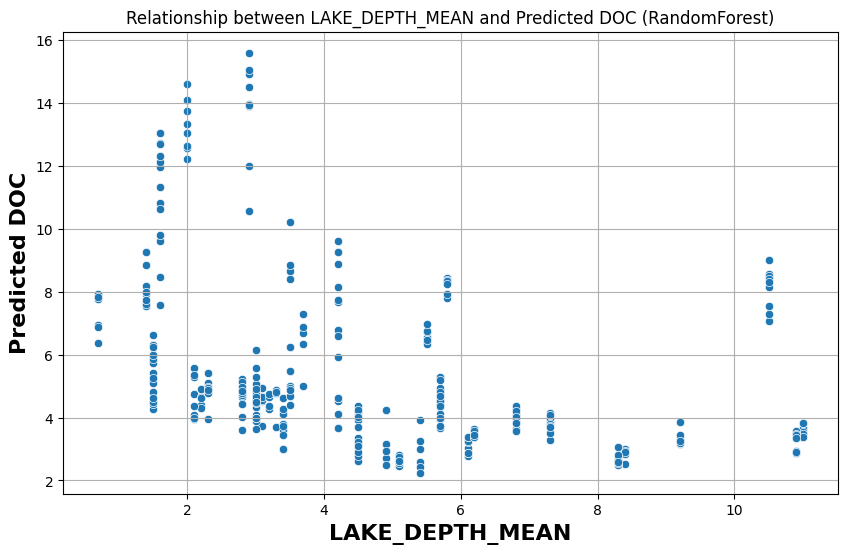

In [35]:
import seaborn as sns

# Define the model you want to analyze (in this case, RandomForest)
model_to_analyze = 'RandomForest'

# Filter the evaluation DataFrame for the specified model
model_evaluation_df = evaluation_df_all[evaluation_df_all['Model'] == model_to_analyze]

# Get the predicted DOC values for the testing data using the selected model
predicted_DOC_values = X_test.copy()  # Copy the testing data
predicted_DOC_values['Predicted_DOC'] = models[model_to_analyze].predict(X_test)  # Predict DOC values

# Create a scatterplot to visualize the relationship between LAKE_DEPTH_MEAN and predicted DOC
plt.figure(figsize=(10, 6))
sns.scatterplot(data=predicted_DOC_values, x='LAKE_DEPTH_MEAN', y='Predicted_DOC')
plt.title(f'Relationship between LAKE_DEPTH_MEAN and Predicted DOC ({model_to_analyze})')
plt.xlabel('LAKE_DEPTH_MEAN', fontsize=16, fontweight='bold')
plt.ylabel('Predicted DOC', fontsize=16, fontweight='bold')
plt.grid(True)

# Show the plot
plt.show()


In [36]:
predicted_DOC_values

,blue,green,red,nir,swir1,swir2,temp,LAKE_DEPTH_MEAN,Predicted_DOC
1049,0.042308,0.061581,0.052079,0.301935,0.146001,0.066650,9.951311,4.5,3.236743
1093,0.026427,0.043300,0.045174,0.211600,0.119758,0.052494,9.588280,4.5,4.146087
4877,0.034855,0.050967,0.058291,0.170929,0.180590,0.108128,25.711428,4.5,4.383236
4330,0.027470,0.051831,0.038217,0.310246,0.161921,0.072597,19.928845,4.5,2.632222
1991,0.036428,0.052518,0.059770,0.169730,0.168795,0.104136,17.400468,4.5,4.219950
...,...,...,...,...,...,...,...,...,...
265,0.019058,0.035846,0.024966,0.268955,0.119812,0.049491,20.937577,9.2,3.344404
3716,0.029835,0.044468,0.042160,0.159543,0.098728,0.052783,10.296115,9.2,3.181672
6172,0.020806,0.040208,0.025631,0.352117,0.155750,0.066073,14.381578,9.2,3.278100
7047,0.116305,0.097330,0.080225,0.095020,0.020742,0.013428,-17.203572,9.2,3.460390


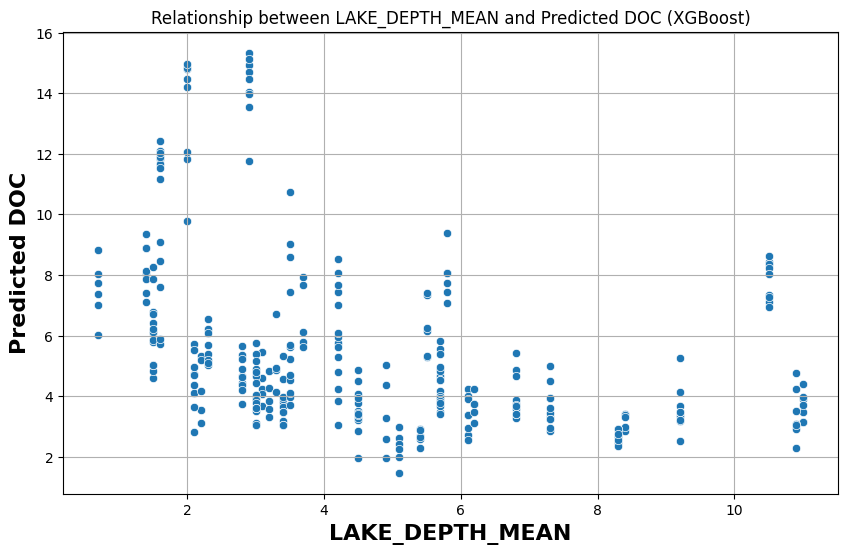

In [37]:
import seaborn as sns

# Define the model you want to analyze (in this case, RandomForest)
model_to_analyze = 'XGBoost'

# Filter the evaluation DataFrame for the specified model
model_evaluation_df = evaluation_df_all[evaluation_df_all['Model'] == model_to_analyze]

# Get the predicted DOC values for the testing data using the selected model
predicted_DOC_values = X_test.copy()  # Copy the testing data
predicted_DOC_values['Predicted_DOC'] = models[model_to_analyze].predict(X_test)  # Predict DOC values

# Create a scatterplot to visualize the relationship between LAKE_DEPTH_MEAN and predicted DOC
plt.figure(figsize=(10, 6))
sns.scatterplot(data=predicted_DOC_values, x='LAKE_DEPTH_MEAN', y='Predicted_DOC')
plt.title(f'Relationship between LAKE_DEPTH_MEAN and Predicted DOC ({model_to_analyze})')
plt.xlabel('LAKE_DEPTH_MEAN', fontsize=16, fontweight='bold')
plt.ylabel('Predicted DOC', fontsize=16, fontweight='bold')
plt.grid(True)

# Show the plot
plt.show()


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
data_modified['DATE_SMP'] = pd.to_datetime(data_modified['DATE_SMP'])

data_modified.sort_values('DATE_SMP', inplace=True)
df_all_lakes.sort_values('DATE_SMP', inplace=True)



# Drop the 'nir' band column
# df_all_lakes.drop(columns='nir', inplace=True)

# Display the DataFrame containing reflectance values for all lakes with the new columns
# print(df_all_lakes)


merged_data_all = pd.merge_asof(data_modified, df_all_lakes, on='DATE_SMP', by=['SITE_NAME','LAKE_DEPTH_MEAN'], tolerance=pd.Timedelta(days=7))

# Drop rows where the 'Reflectance' column is null
merged_data_all = merged_data_all.dropna(subset=['blue'])

merged_data_all = merged_data_all.dropna(subset=['DOC_MG_L'])

merged_data_all = merged_data_all[merged_data_all['PROGRAM_ID'] == 'LTM_ALTM']


# Display the updated DataFrame
# print(merged_data)
merged_data_all


# Preprocessing the 'DATE_SMP' column to extract useful features
merged_data_all['DATE_SMP'] = pd.to_datetime(merged_data_all['DATE_SMP'])  # Convert to datetime if not already done
merged_data_all['year'] = merged_data_all['DATE_SMP'].dt.year
merged_data_all['month'] = merged_data_all['DATE_SMP'].dt.month
merged_data_all['day'] = merged_data_all['DATE_SMP'].dt.day
# merged_data_all['day_of_week'] = merged_data_all['DATE_SMP'].dt.dayofweek

# Drop the original 'DATE_SMP' column as it is no longer needed
merged_data_all = merged_data_all.drop(columns=['DATE_SMP'])


# Calculate NDWI and MNDWI
merged_data_all['NDWI'] = (merged_data_all['green'] - merged_data_all['nir']) / (merged_data_all['green'] + merged_data_all['nir'])
merged_data_all['MNDWI'] = (merged_data_all['green'] - merged_data_all['swir1']) / (merged_data_all['green'] + merged_data_all['swir1'])


# Preparing the training data 
X = merged_data_all[['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp','LAKE_DEPTH_MEAN']]  # Features
y = merged_data_all['DOC_MG_L']  # Target variable

# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_all.groupby('LAKE_LABEL')

min_samples = 3  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp','LAKE_DEPTH_MEAN']]
    y_lake = lake_group['DOC_MG_L']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# WITH LAKE Depth AS FEATURES 7 day window/n')
print(evaluation_df_all)

**************Data Points Used***************************
Number of rows: 1807
Number of columns: 8
*************Predicted Training data (RandomForest)***************
           blue     green       red       nir     swir1     swir2       temp  \
10410  0.026221  0.046283  0.030849  0.338767  0.150179  0.059842  26.602752   
1093   0.026427  0.043300  0.045174  0.211600  0.119758  0.052494   9.588280   
3220   0.019333  0.038225  0.026560  0.305340  0.145740  0.059622  22.632768   
3712   0.035348  0.051803  0.059384  0.175847  0.173947  0.105704  17.181144   
1693   0.058582  0.067624  0.066175  0.167263  0.104486  0.058689   1.254657   
...         ...       ...       ...       ...       ...       ...        ...   
714    0.038624  0.053777  0.054519  0.175383  0.147346  0.086510  18.820820   
9703   0.033987  0.052249  0.056138  0.162709  0.147597  0.091221  16.787362   
1987   0.030278  0.045740  0.050515  0.155175  0.115714  0.066730  10.466714   
5142   0.040886  0.042119  0.0353

In [39]:
# Assuming you have already trained a Random Forest model
random_forest_model = models['RandomForest']
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display the feature importances with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print("RandomForest Feature Importances:")
print(feature_importance_df)


RandomForest Feature Importances:
           Feature  Importance
0             blue    0.028337
1            green    0.040564
2              red    0.032954
3              nir    0.038866
4            swir1    0.056217
5            swir2    0.041348
6             temp    0.044238
7  LAKE_DEPTH_MEAN    0.717476


# CDOM ANALYSIS

In [40]:
# Function to create a five-sided polygon around the latitude and longitude
import ee
import geemap

# Function to create a five-sided polygon around the latitude and longitude
def create_lake_polygon(lat, lon):
    # Assuming each pixel is approximately 20 meters in size
    buffer_distance_meters = 3 * 20

    
    # Convert buffer distance from meters to degrees (approximate conversion)
    buffer_distance_degrees = buffer_distance_meters / 111320.0

    # Define the coordinates of the five vertices of the polygon
    coordinates = [
        [lon, lat + buffer_distance_degrees],
        [lon + buffer_distance_degrees, lat + buffer_distance_degrees / 2],
        [lon + buffer_distance_degrees / 2, lat - buffer_distance_degrees / 2],
        [lon - buffer_distance_degrees / 2, lat - buffer_distance_degrees / 2],
        [lon - buffer_distance_degrees, lat + buffer_distance_degrees / 2]
    ]

    # Create the polygon geometry
    polygon = ee.Geometry.Polygon(coordinates)

    return polygon

In [41]:
import ee
import geemap
import pandas as pd

# Authenticate and initialize the Earth Engine API
ee.Initialize()

# # Create a list of lake names
# lake_names = [
#     'Little Hope Pond', 'Big Hope Pond', 'East Copperas Pond', 'Sunday Pond', 'Sochia Pond',
#     'Grass Pond (3)', 'Little Clear Pond', 'Loon Hollow Pond', 'Willys Lake', 'Woods Lake',
#     'Middle Settlement Lake', 'Middle Branch Lake', 'Limekiln Lake', 'Squaw Lake', 'Indian Lake',
#     'Brook Trout Lake', 'Lost Pond', 'North Lake', 'Willis Lake', 'Long Pond', 'Carry Pond',
#     'Lake Colden', 'Avalanche Lake', 'Little Simon Pond', 'Raquette Lake Reservoir', 'G Lake',
#     'Constable Pond', 'Middle Pond', 'Arbutus Pond', 'Sagamore Lake', 'Black Pond', 'Windfall Pond',
#     'Queer Lake', 'Heart Lake', 'Big Moose Lake', 'Cascade Lake', 'Dart Lake', 'Little Echo Pond',
#     'Moss Lake', 'Lake Rondaxe', 'Squash Pond', 'West Pond', 'Owen Pond', 'Jockeybush Lake',
#     'Barnes Lake', 'Clear Pond', 'Otter Lake', 'Nate Pond', 'Grass Pond', 'South Lake (East Branch)'
# ]


lake_names = ['Barnes Lake', 'Big Hope Pond', 'Brook Trout Lake', 'Constable Pond', 'Grass Pond (3)', 'Little Echo Pond', 
 'Loon Hollow Pond', 'Otter Lake', 'Sochia Pond', 'South Lake (East Branch)', 'Squash Pond', 'Sunday Pond', 
 'West Pond', 'Willis Lake', 'Windfall Pond', 'Middle Pond*', 'Carry Pond', 'Little Clear Pond', 'Little Hope Pond*', 
 'Heart Lake', 'Limekiln Lake', 'Avalanche Lake', 'Cascade Lake', 'Grass Pond', 'Little Simon Pond*', 'Long Pond', 
 'Nate Pond*', 'Raquette Lake Reservoir*', 'Sagamore Lake*', 'Lake Rondaxe', 'Dart Lake', 'G Lake', 'Indian Lake', 
 'Jockeybush Lake', 'Lake Colden', 'Lost Pond*', 'Middle Branch Lake', 'Middle Settlement Lake', 'North Lake', 
 'Queer Lake', 'Squaw Lake', 'Willys Lake', 'Woods Lake', 'Owen Pond', 'Copperas Pond', 'Arbutus Pond', 'Moss Lake', 
 'Big Moose Lake', 'Black Pond', 'Clear Pond']

# Define the Landsat 5 bands and their corresponding standard names
LC5_BANDS = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'ST_B6', 'QA_PIXEL']
STD_NAMES = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp', 'QA']

# Define a function to mask clouds and cloud shadows from Landsat 5 surface reflectance imagery
def maskL457sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)

    qa_values_to_filter = [5440, 5442, 5696, 13664]

    mask = image.select('QA_PIXEL').eq(qa_values_to_filter[0])
    for qa_value in qa_values_to_filter[1:]:
        mask = mask.Or(image.select('QA_PIXEL').eq(qa_value))

    filtered_image = image.updateMask(mask)

    opticalBands = filtered_image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = filtered_image.select('ST_B6').multiply(0.00341802).add(-124.15)
    return filtered_image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask)

# Define a function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake, scale=30).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# Initialize an empty list to store the dataframes for each lake
dfs = []

# Create a dictionary to map each lake name to a numerical label
lake_name_to_label = {lake_name: i for i, lake_name in enumerate(lake_names)}

# Loop through each lake name and retrieve Landsat 5 imagery for that lake
for SITE_NAME in lake_names:
    # Retrieve the lake using the filter
    lake = ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALTM_ALAP_Sta_coordinates')\
        .filter(ee.Filter.Or(
            ee.Filter.eq('Program', 'ALTM'),
            ee.Filter.eq('Program', 'ALAP_ALTM')
        ))\
         .filter(ee.Filter.eq('Name', SITE_NAME))

    # # Check if any features were returned by the filter
    # if lake.size().getInfo() > 0:
        # Get the latitude and longitude of the station point
    lat = ee.Number(lake.first().geometry().coordinates().get(1)).getInfo()
    lon = ee.Number(lake.first().geometry().coordinates().get(0)).getInfo()

    # Create a polygon around the station point using the latitude and longitude
    lake_polygon = ee.Geometry.Point(lon, lat).buffer(1000)

    # Retrieve Landsat 5 imagery for the specific lake
    l5 = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
        .filter(ee.Filter.calendarRange(5, 12, 'month')) \
        .filter(ee.Filter.calendarRange(1985, 2011, 'year')) \
        .filterBounds(lake_polygon) \
        .filter(ee.Filter.lt('CLOUD_COVER', 25)) \
        .map(maskL457sr) \
        .select(LC5_BANDS, STD_NAMES)

    # Map the reflectance function over the Landsat 5 ImageCollection for the specific lake
    map_reflectance = l5.map(lambda img: reflectance(img, lake_polygon))

    # Reduce the mapped image collection to get reflectance values for the specific lake
    list_reflectance = map_reflectance.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

    # Convert the results to a pandas DataFrame
    df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
    df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
    df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
    df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v for k, v in x.items() if v is not None})

    # Unpack the 'reflectance' dictionary and create separate columns for each band
    df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
                                df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)

    # Add a new column for the lake name
    df_reflectance['SITE_NAME'] = SITE_NAME

    # Add a new column for the lake label (numeric representation)
    df_reflectance['LAKE_LABEL'] = lake_name_to_label[SITE_NAME]

    # Add the DataFrame to the list
    dfs.append(df_reflectance)

# Concatenate all DataFrames into a single DataFrame
df_all_lakes = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by 'DATE_SMP' in ascending order
df_all_lakes.sort_values(by='DATE_SMP', inplace=True)


In [42]:
df_all_lakes.dropna(inplace=True)

df_all_lakes


,DATE_SMP,QA,blue,green,nir,red,swir1,swir2,temp,SITE_NAME,LAKE_LABEL
10620,1985-06-04,5440.370949,0.045259,0.068343,0.241871,0.054055,0.118311,0.059800,1.893274,Clear Pond,49
112,1985-06-04,5441.048676,0.049934,0.076695,0.298967,0.059746,0.148307,0.072439,3.176108,Big Hope Pond,1
824,1985-06-04,5445.968552,0.058101,0.088718,0.384343,0.068833,0.194211,0.094595,10.644590,Grass Pond (3),4
9513,1985-06-04,5440.000000,0.053970,0.085566,0.378157,0.064073,0.179451,0.084484,10.362473,Arbutus Pond,45
4975,1985-06-04,5465.776910,0.068239,0.098997,0.388912,0.076750,0.188045,0.090188,7.023683,Little Simon Pond*,24
...,...,...,...,...,...,...,...,...,...,...,...
3435,2011-10-09,5440.000000,0.025638,0.049230,0.207227,0.050062,0.139238,0.065030,21.155535,Middle Pond*,15
1576,2011-10-09,5440.000000,0.026424,0.048789,0.217964,0.051815,0.157325,0.074614,22.386365,Otter Lake,7
2923,2011-10-09,5440.000000,0.024004,0.043539,0.215587,0.041928,0.127259,0.054331,22.823486,Willis Lake,13
7939,2011-10-09,5440.000000,0.032925,0.050872,0.196556,0.055583,0.170188,0.084807,21.946587,Middle Branch Lake,36


In [43]:
import pandas as pd

# Remove the asterisk (*) from the 'SITE_NAME' column
df_all_lakes['SITE_NAME'] = df_all_lakes['SITE_NAME'].str.replace('*', '')

# Print the updated 'df_all_lakes' DataFrame
df_all_lakes['SITE_NAME'] 

10620            Clear Pond
112           Big Hope Pond
824          Grass Pond (3)
9513           Arbutus Pond
4975      Little Simon Pond
                ...        
3435            Middle Pond
1576             Otter Lake
2923            Willis Lake
7939     Middle Branch Lake
10820            Clear Pond
Name: SITE_NAME, Length: 10173, dtype: object

In [44]:
# LC5_BANDS = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'ST_B6', 'QA_PIXEL']
# STD_NAMES = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp', 'QA']

In [45]:
import numpy as np
#Linear regreesion analysis
# change a1 and a2 what will be the best r^2 value?
# Coefficients
a1 = -0.5986
a2 = 5.5510

# Calculate the B4/B1 ratio and add it as a new column to the DataFrame
df_all_lakes['B4_B1_Ratio'] = df_all_lakes['nir'] / df_all_lakes['blue']

# Apply the equation to estimate CDOM at 485 nm
df_all_lakes['aCDOM_485'] = a1 + a2 * (df_all_lakes['B4_B1_Ratio'])



In [46]:
df_all_lakes

,DATE_SMP,QA,blue,green,nir,red,swir1,swir2,temp,SITE_NAME,LAKE_LABEL,B4_B1_Ratio,aCDOM_485
10620,1985-06-04,5440.370949,0.045259,0.068343,0.241871,0.054055,0.118311,0.059800,1.893274,Clear Pond,49,5.344122,29.066620
112,1985-06-04,5441.048676,0.049934,0.076695,0.298967,0.059746,0.148307,0.072439,3.176108,Big Hope Pond,1,5.987233,32.636528
824,1985-06-04,5445.968552,0.058101,0.088718,0.384343,0.068833,0.194211,0.094595,10.644590,Grass Pond (3),4,6.615125,36.121958
9513,1985-06-04,5440.000000,0.053970,0.085566,0.378157,0.064073,0.179451,0.084484,10.362473,Arbutus Pond,45,7.006752,38.295883
4975,1985-06-04,5465.776910,0.068239,0.098997,0.388912,0.076750,0.188045,0.090188,7.023683,Little Simon Pond,24,5.699268,31.038037
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3435,2011-10-09,5440.000000,0.025638,0.049230,0.207227,0.050062,0.139238,0.065030,21.155535,Middle Pond,15,8.082804,44.269043
1576,2011-10-09,5440.000000,0.026424,0.048789,0.217964,0.051815,0.157325,0.074614,22.386365,Otter Lake,7,8.248672,45.189776
2923,2011-10-09,5440.000000,0.024004,0.043539,0.215587,0.041928,0.127259,0.054331,22.823486,Willis Lake,13,8.981342,49.256832
7939,2011-10-09,5440.000000,0.032925,0.050872,0.196556,0.055583,0.170188,0.084807,21.946587,Middle Branch Lake,36,5.969873,32.540163


# THREE DAY WINDOW

In [47]:
df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
data_modified['DATE_SMP'] = pd.to_datetime(data_modified['DATE_SMP'])

data_modified.sort_values('DATE_SMP', inplace=True)
df_all_lakes.sort_values('DATE_SMP', inplace=True)


merged_data = pd.merge_asof(data_modified, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=3))
# Drop rows with null values in the merged dataframe
merged_data.dropna(inplace=True)

merged_data = merged_data.dropna(subset=['blue'])

merged_data = merged_data.dropna(subset=['DOC_MG_L'])

# merged_data = merged_data[merged_data['PROGRAM_ID'] == 'LTM_ALTM']
merged_data

,SITE_ID,DATE_SMP,DOC_MG_L,PROGRAM_ID,SITE_NAME,LAKE_DEPTH_MEAN,LATDD,LONDD,LATDD_CENT,LONDD_CENT,...,blue,green,nir,red,swir1,swir2,temp,LAKE_LABEL,B4_B1_Ratio,aCDOM_485
262,1A1-102,1985-07-22,3.000000,LTM_ALTM,Heart Lake,5.1,44.18050,-73.96726,44.18229,-73.96920,...,0.020137,0.039422,0.384604,0.026572,0.160915,0.061770,19.330370,19.0,19.098890,105.419341
263,1A1-052,1985-07-22,5.000000,LTM_ALTM,Arbutus Pond,2.8,43.98230,-74.23556,43.98787,-74.24151,...,0.020165,0.038826,0.345385,0.025550,0.154602,0.061785,20.188642,45.0,17.128063,94.479279
264,1A1-107,1985-07-22,13.800000,LTM_ALTM,Little Echo Pond,2.9,44.30576,-74.35721,44.30849,-74.35564,...,0.020138,0.039104,0.277870,0.027053,0.126081,0.052966,21.286842,5.0,13.798422,75.996438
265,1A2-077,1985-07-22,3.300000,LTM_ALTM,Clear Pond,9.2,43.99568,-73.83082,43.99719,-73.82435,...,0.019058,0.035846,0.268955,0.024966,0.119812,0.049491,20.937577,49.0,14.112373,77.739182
286,1A1-107,1985-10-26,14.400000,LTM_ALTM,Little Echo Pond,2.9,44.30576,-74.35721,44.30849,-74.35564,...,0.024942,0.037269,0.145780,0.035721,0.100117,0.051986,8.967856,5.0,5.844690,31.845273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12307,1A1-017,2011-10-12,6.606590,LTM_ALTM,Constable Pond,2.1,43.83101,-74.80642,43.83290,-74.79820,...,0.026080,0.042116,0.172265,0.040742,0.120717,0.059083,20.350430,3.0,6.605168,36.066685
12308,1A1-087,2011-10-12,4.025449,LTM_ALTM,Windfall Pond,3.2,43.80497,-74.83077,43.80529,-74.82890,...,0.027834,0.049857,0.203623,0.052235,0.154307,0.075312,20.864566,14.0,7.315557,40.010058
12309,050707,2011-10-12,10.553219,LTM_ALTM,Avalanche Lake,3.3,44.13056,-73.96983,44.13287,-73.96681,...,0.018852,0.029160,0.137618,0.024675,0.072090,0.035378,18.406381,21.0,7.299766,39.922403
12310,1A1-106,2011-10-12,4.695706,LTM_ALTM,Dart Lake,7.3,43.79376,-74.87257,43.79548,-74.86409,...,0.028297,0.046700,0.186317,0.048086,0.138676,0.068719,20.702528,30.0,6.584272,35.950695


In [48]:
merged_data

,SITE_ID,DATE_SMP,DOC_MG_L,PROGRAM_ID,SITE_NAME,LAKE_DEPTH_MEAN,LATDD,LONDD,LATDD_CENT,LONDD_CENT,...,blue,green,nir,red,swir1,swir2,temp,LAKE_LABEL,B4_B1_Ratio,aCDOM_485
262,1A1-102,1985-07-22,3.000000,LTM_ALTM,Heart Lake,5.1,44.18050,-73.96726,44.18229,-73.96920,...,0.020137,0.039422,0.384604,0.026572,0.160915,0.061770,19.330370,19.0,19.098890,105.419341
263,1A1-052,1985-07-22,5.000000,LTM_ALTM,Arbutus Pond,2.8,43.98230,-74.23556,43.98787,-74.24151,...,0.020165,0.038826,0.345385,0.025550,0.154602,0.061785,20.188642,45.0,17.128063,94.479279
264,1A1-107,1985-07-22,13.800000,LTM_ALTM,Little Echo Pond,2.9,44.30576,-74.35721,44.30849,-74.35564,...,0.020138,0.039104,0.277870,0.027053,0.126081,0.052966,21.286842,5.0,13.798422,75.996438
265,1A2-077,1985-07-22,3.300000,LTM_ALTM,Clear Pond,9.2,43.99568,-73.83082,43.99719,-73.82435,...,0.019058,0.035846,0.268955,0.024966,0.119812,0.049491,20.937577,49.0,14.112373,77.739182
286,1A1-107,1985-10-26,14.400000,LTM_ALTM,Little Echo Pond,2.9,44.30576,-74.35721,44.30849,-74.35564,...,0.024942,0.037269,0.145780,0.035721,0.100117,0.051986,8.967856,5.0,5.844690,31.845273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12307,1A1-017,2011-10-12,6.606590,LTM_ALTM,Constable Pond,2.1,43.83101,-74.80642,43.83290,-74.79820,...,0.026080,0.042116,0.172265,0.040742,0.120717,0.059083,20.350430,3.0,6.605168,36.066685
12308,1A1-087,2011-10-12,4.025449,LTM_ALTM,Windfall Pond,3.2,43.80497,-74.83077,43.80529,-74.82890,...,0.027834,0.049857,0.203623,0.052235,0.154307,0.075312,20.864566,14.0,7.315557,40.010058
12309,050707,2011-10-12,10.553219,LTM_ALTM,Avalanche Lake,3.3,44.13056,-73.96983,44.13287,-73.96681,...,0.018852,0.029160,0.137618,0.024675,0.072090,0.035378,18.406381,21.0,7.299766,39.922403
12310,1A1-106,2011-10-12,4.695706,LTM_ALTM,Dart Lake,7.3,43.79376,-74.87257,43.79548,-74.86409,...,0.028297,0.046700,0.186317,0.048086,0.138676,0.068719,20.702528,30.0,6.584272,35.950695


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


R^2: 0.00025510671142370267
RMSE: 27.38701147509683


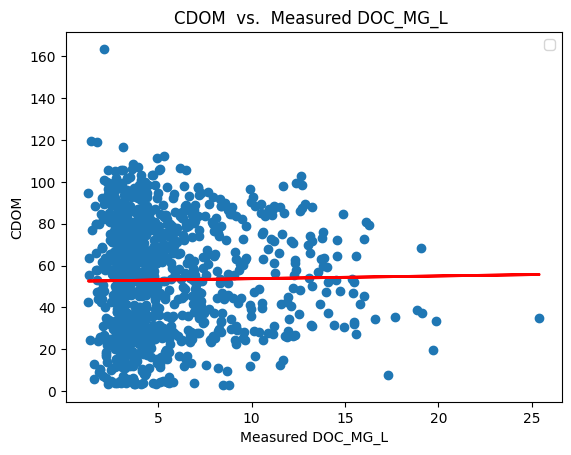

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X = merged_data['DOC_MG_L'].values.reshape(-1, 1)
y = merged_data['aCDOM_485'].values

# Create a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Predict y values using the model
y_pred = regression_model.predict(X)

# Calculate R^2
r2 = r2_score(y, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print R^2 and RMSE
print("R^2:", r2)
print("RMSE:", rmse)

# Plot measured DOC_MG_L against aCDOM
plt.scatter(merged_data['DOC_MG_L'], merged_data['aCDOM_485'])
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('Measured DOC_MG_L')
plt.ylabel('CDOM')
plt.title('CDOM  vs.  Measured DOC_MG_L ')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


R^2: 0.07279069805966354
RMSE: 16.924884927392615


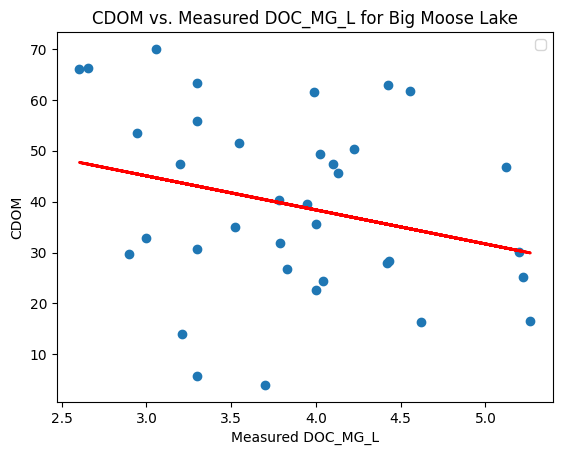

In [50]:
# Filter the data for "Big Moose Lake"
big_moose_lake_data = merged_data[merged_data['SITE_NAME'] == 'Big Moose Lake']

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X = big_moose_lake_data['DOC_MG_L'].values.reshape(-1, 1)
y = big_moose_lake_data['aCDOM_485'].values

# Create a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Predict y values using the model
y_pred = regression_model.predict(X)

# Calculate R^2
r2 = r2_score(y, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print R^2 and RMSE
print("R^2:", r2)
print("RMSE:", rmse)

# Plot measured DOC_MG_L against aCDOM for Big Moose Lake
plt.scatter(big_moose_lake_data['DOC_MG_L'], big_moose_lake_data['aCDOM_485'])
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('Measured DOC_MG_L')
plt.ylabel('CDOM')
plt.title('CDOM vs. Measured DOC_MG_L for Big Moose Lake')
plt.legend()
plt.show()


In [51]:
big_moose_lake_data

,SITE_ID,DATE_SMP,DOC_MG_L,PROGRAM_ID,SITE_NAME,LAKE_DEPTH_MEAN,LATDD,LONDD,LATDD_CENT,LONDD_CENT,...,blue,green,nir,red,swir1,swir2,temp,LAKE_LABEL,B4_B1_Ratio,aCDOM_485
291,1A1-103,1985-10-27,3.300000,LTM_ALTM,Big Moose Lake,6.8,43.81687,-74.85611,43.83221,-74.84646,...,0.024352,0.034014,0.137259,0.034195,0.114847,0.064272,9.974754,47.0,5.636494,30.689579
354,1A1-103,1986-06-17,3.200000,LTM_ALTM,Big Moose Lake,6.8,43.81687,-74.85611,43.83221,-74.84646,...,0.032107,0.046634,0.277212,0.032483,0.124035,0.051208,18.458286,47.0,8.634098,47.329279
365,1A1-103,1986-07-16,3.300000,LTM_ALTM,Big Moose Lake,6.8,43.81687,-74.85611,43.83221,-74.84646,...,0.020809,0.035270,0.239504,0.023479,0.108179,0.042839,23.386579,47.0,11.509381,63.289972
385,1A1-103,1986-10-23,5.200000,LTM_ALTM,Big Moose Lake,6.8,43.81687,-74.85611,43.83221,-74.84646,...,0.023140,0.034306,0.127669,0.034670,0.106559,0.059618,8.751523,47.0,5.517214,30.027453
545,1A1-103,1988-06-30,3.300000,LTM_ALTM,Big Moose Lake,6.8,43.81687,-74.85611,43.83221,-74.84646,...,0.024853,0.041457,0.252858,0.027290,0.113650,0.048602,18.491991,47.0,10.174300,55.878937
636,1A1-103,1989-07-11,2.900000,LTM_ALTM,Big Moose Lake,6.8,43.81687,-74.85611,43.83221,-74.84646,...,0.046186,0.055113,0.251610,0.039934,0.111621,0.050090,19.871884,47.0,5.447722,29.641706
672,1A1-103,1989-11-25,3.700000,LTM_ALTM,Big Moose Lake,6.8,43.81687,-74.85611,43.83221,-74.84646,...,0.111190,0.094844,0.092808,0.078498,0.019405,0.012722,-4.755299,47.0,0.834675,4.034680
757,1A1-103,1990-11-03,4.000000,LTM_ALTM,Big Moose Lake,6.8,43.81687,-74.85611,43.83221,-74.84646,...,0.019173,0.030712,0.124712,0.030512,0.093927,0.052046,5.589023,47.0,6.504578,35.508311
802,1A1-103,1991-05-06,4.000000,LTM_ALTM,Big Moose Lake,6.8,43.81687,-74.85611,43.83221,-74.84646,...,0.040511,0.055855,0.169236,0.058606,0.142575,0.086361,10.027544,47.0,4.177497,22.590684
867,1A1-103,1991-12-08,3.300000,LTM_ALTM,Big Moose Lake,6.8,43.81687,-74.85611,43.83221,-74.84646,...,0.077022,0.073225,0.088184,0.064505,0.029093,0.016593,-7.606749,47.0,1.144914,5.756820


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


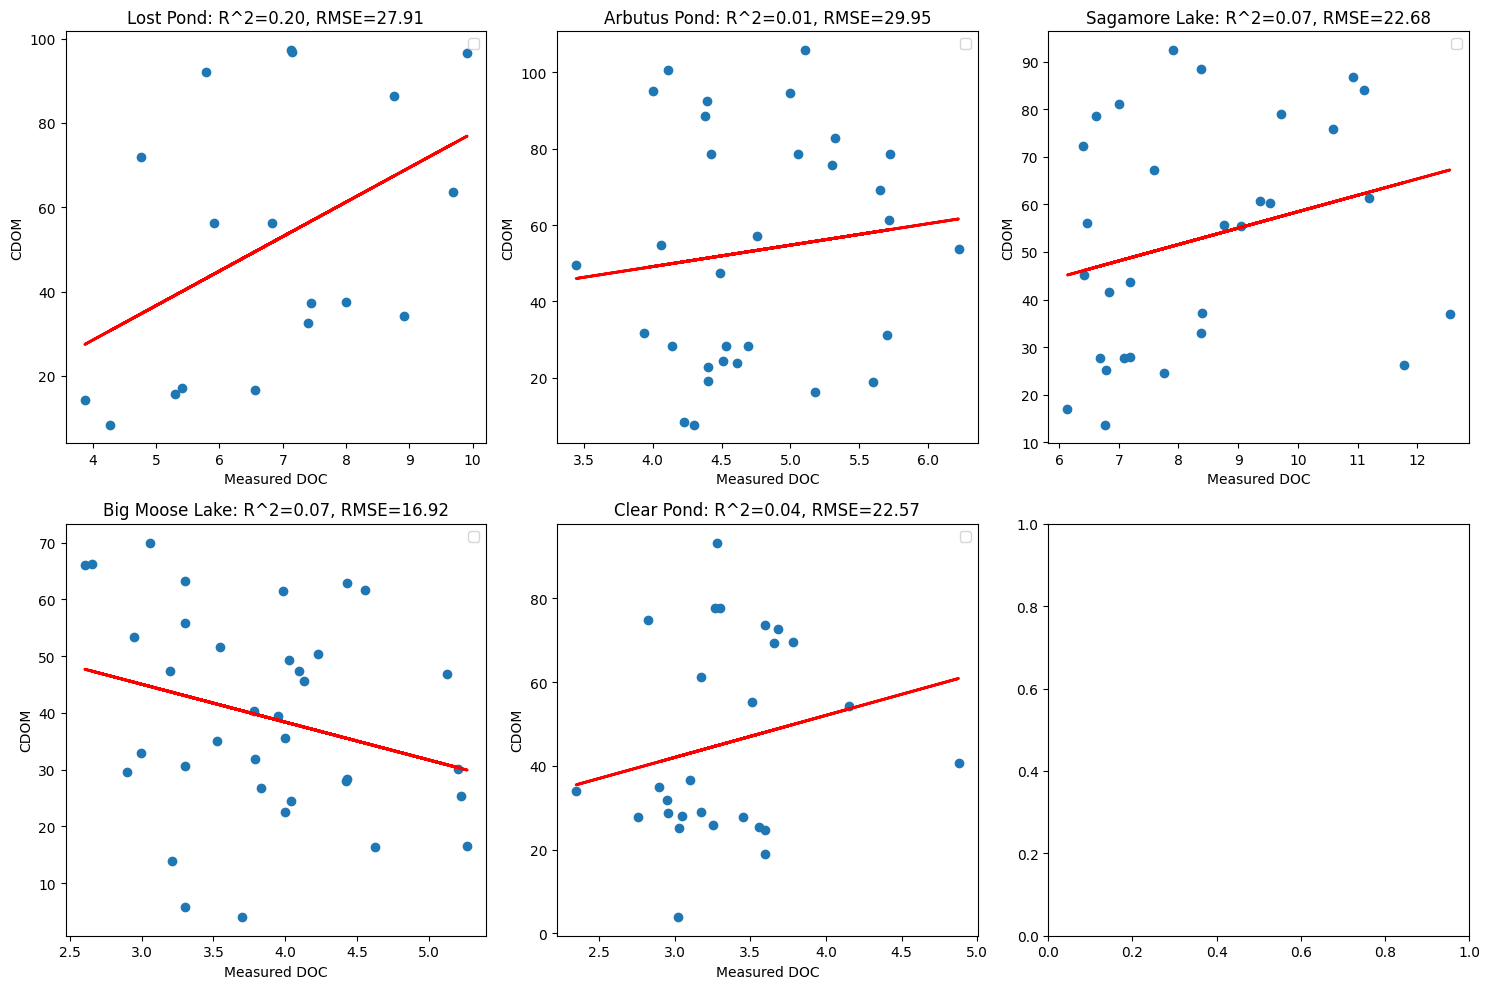

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'aCDOM_485'  # Replace with the actual column name for aCDOM_485

# Create a list of lakes
lakes = ["Lost Pond", "Arbutus Pond", "Sagamore Lake", "Big Moose Lake", "Clear Pond"]

# Create subplots for all lakes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(lakes):
    # Filter the data for the current lake
    lake_data = merged_data[merged_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


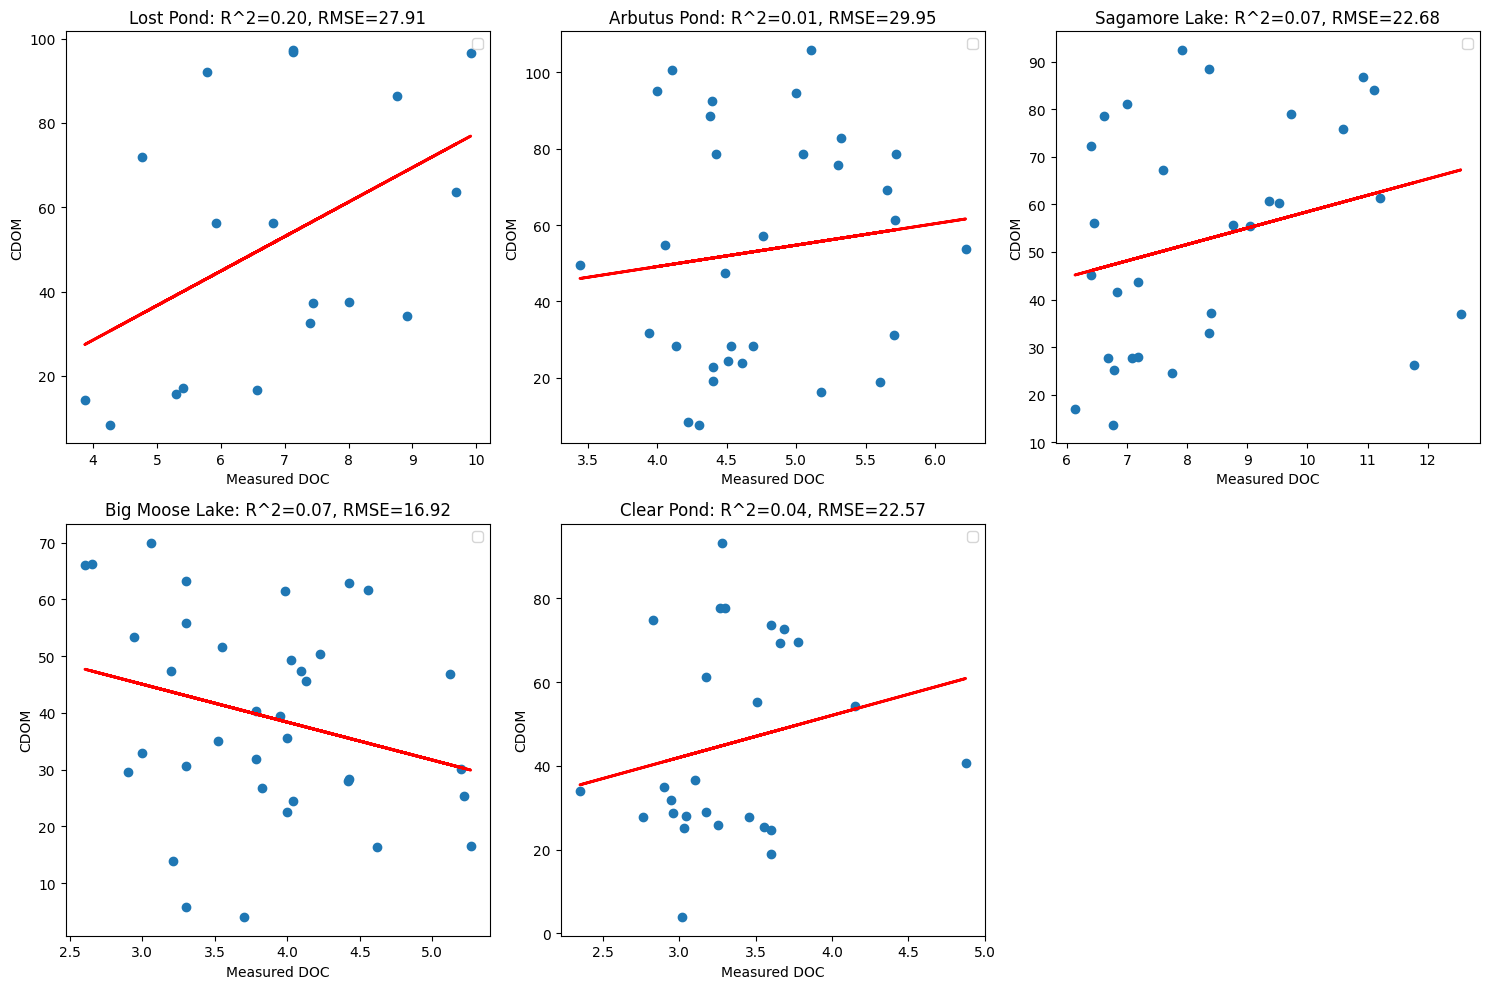

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'aCDOM_485'  # Replace with the actual column name for aCDOM_485

# Create a list of lakes
lakes = ["Lost Pond", "Arbutus Pond", "Sagamore Lake", "Big Moose Lake", "Clear Pond"]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(lakes)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for all lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(lakes):
    # Filter the data for the current lake
    lake_data = merged_data[merged_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(len(lakes), num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


# 1 day Winodw

R^2: 1.6321173557098945e-07
RMSE: 28.018873107753677


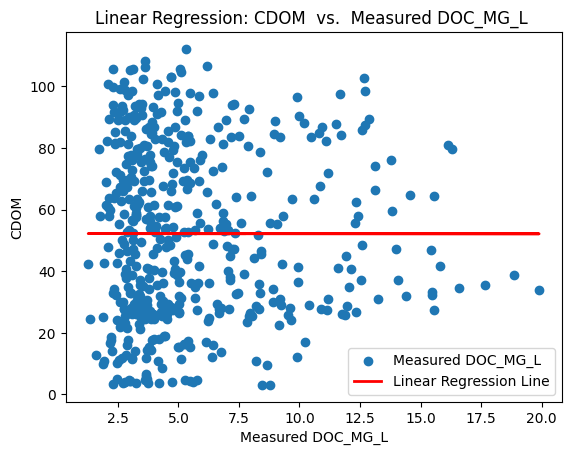

In [54]:
df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
data_modified['DATE_SMP'] = pd.to_datetime(data_modified['DATE_SMP'])

data_modified.sort_values('DATE_SMP', inplace=True)
df_all_lakes.sort_values('DATE_SMP', inplace=True)


merged_data = pd.merge_asof(data_modified, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=1))
# Drop rows with null values in the merged dataframe
merged_data.dropna(inplace=True)

merged_data = merged_data.dropna(subset=['blue'])

merged_data = merged_data.dropna(subset=['DOC_MG_L'])

merged_data = merged_data[merged_data['PROGRAM_ID'] == 'LTM_ALTM']

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X = merged_data['DOC_MG_L'].values.reshape(-1, 1)
y = merged_data['aCDOM_485'].values

# Create a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Predict y values using the model
y_pred = regression_model.predict(X)

# Calculate R^2
r2 = r2_score(y, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print R^2 and RMSE
print("R^2:", r2)
print("RMSE:", rmse)

# Plot measured DOC_MG_L against aCDOM
plt.scatter(merged_data['DOC_MG_L'], merged_data['aCDOM_485'],  label='Measured DOC_MG_L')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Measured DOC_MG_L')
plt.ylabel('CDOM')
plt.title('Linear Regression: CDOM  vs.  Measured DOC_MG_L ')
plt.legend()
plt.show()


# 7 day window

R^2: 0.0006790665691877029
RMSE: 27.996305149573917


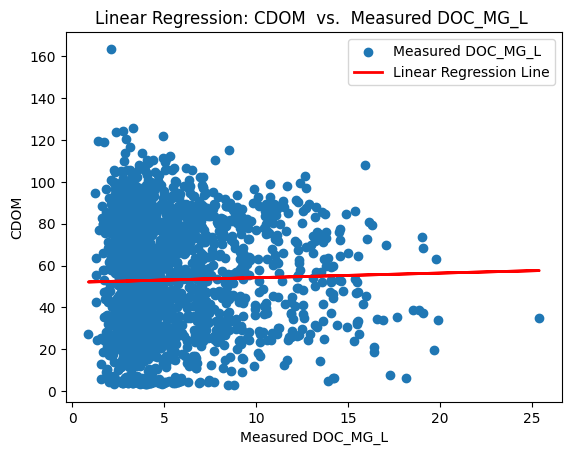

In [55]:
df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
data_modified['DATE_SMP'] = pd.to_datetime(data_modified['DATE_SMP'])

data_modified.sort_values('DATE_SMP', inplace=True)
df_all_lakes.sort_values('DATE_SMP', inplace=True)


merged_data = pd.merge_asof(data_modified, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=7))
# Drop rows with null values in the merged dataframe
merged_data.dropna(inplace=True)

merged_data = merged_data.dropna(subset=['blue'])

merged_data = merged_data.dropna(subset=['DOC_MG_L'])

merged_data = merged_data[merged_data['PROGRAM_ID'] == 'LTM_ALTM']

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X = merged_data['DOC_MG_L'].values.reshape(-1, 1)
y = merged_data['aCDOM_485'].values

# Create a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Predict y values using the model
y_pred = regression_model.predict(X)

# Calculate R^2
r2 = r2_score(y, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print R^2 and RMSE
print("R^2:", r2)
print("RMSE:", rmse)

# Plot measured DOC_MG_L against aCDOM
plt.scatter(merged_data['DOC_MG_L'], merged_data['aCDOM_485'],  label='Measured DOC_MG_L')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Measured DOC_MG_L')
plt.ylabel('CDOM')
plt.title('Linear Regression: CDOM  vs.  Measured DOC_MG_L ')
plt.legend()
plt.show()



# BIG MOOSE LAKE

R^2: 0.0006822158252431931
RMSE: 28.018935419943517


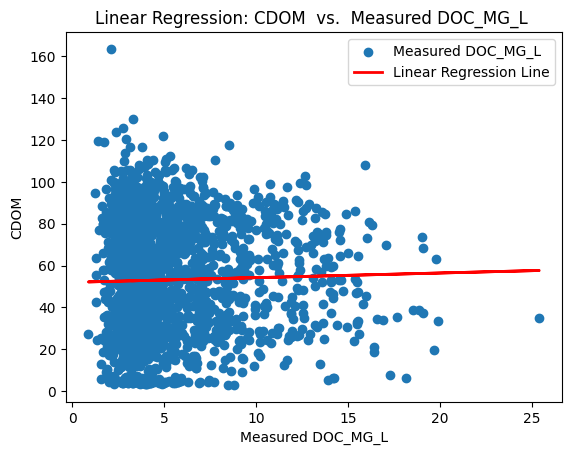

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
data_modified['DATE_SMP'] = pd.to_datetime(data_modified['DATE_SMP'])

data_modified.sort_values('DATE_SMP', inplace=True)
df_all_lakes.sort_values('DATE_SMP', inplace=True)


merged_data = pd.merge_asof(data_modified, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=7))
# Drop rows with null values in the merged dataframe
merged_data.dropna(inplace=True)

merged_data = merged_data.dropna(subset=['blue'])

merged_data = merged_data.dropna(subset=['DOC_MG_L'])

merged_data = merged_data[merged_data['PROGRAM_ID'] == 'LTM_ALTM']
# merged_data = merged_data[merged_data['SITE_NAME'] == 'Big Moose lake']


# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X = merged_data['DOC_MG_L'].values.reshape(-1, 1)
y = merged_data['aCDOM_485'].values

# Create a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Predict y values using the model
y_pred = regression_model.predict(X)

# Calculate R^2
r2 = r2_score(y, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print R^2 and RMSE
print("R^2:", r2)
print("RMSE:", rmse)

# Plot measured DOC_MG_L against aCDOM
plt.scatter(merged_data['DOC_MG_L'], merged_data['aCDOM_485'],  label='Measured DOC_MG_L')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Measured DOC_MG_L')
plt.ylabel('CDOM')
plt.title('Linear Regression: CDOM  vs.  Measured DOC_MG_L ')
plt.legend()
plt.show()



In [57]:
pd.set_option('display.max_rows', None)
# df_all_lakes
merged_data

,SITE_ID,DATE_SMP,DOC_MG_L,PROGRAM_ID,SITE_NAME,LAKE_DEPTH_MEAN,LATDD,LONDD,LATDD_CENT,LONDD_CENT,...,blue,green,nir,red,swir1,swir2,temp,LAKE_LABEL,B4_B1_Ratio,aCDOM_485
262,1A2-077,1985-07-22,3.300000,LTM_ALTM,Clear Pond,9.2,43.99568,-73.83082,43.99719,-73.82435,...,0.019058,0.035846,0.268955,0.024966,0.119812,0.049491,20.937577,49.0,14.112373,77.739182
263,1A1-107,1985-07-22,13.800000,LTM_ALTM,Little Echo Pond,2.9,44.30576,-74.35721,44.30849,-74.35564,...,0.020138,0.039104,0.277870,0.027053,0.126081,0.052966,21.286842,5.0,13.798422,75.996438
264,1A1-052,1985-07-22,5.000000,LTM_ALTM,Arbutus Pond,2.8,43.98230,-74.23556,43.98787,-74.24151,...,0.020165,0.038826,0.345385,0.025550,0.154602,0.061785,20.188642,45.0,17.128063,94.479279
265,1A1-102,1985-07-22,3.000000,LTM_ALTM,Heart Lake,5.1,44.18050,-73.96726,44.18229,-73.96920,...,0.020137,0.039422,0.384604,0.026572,0.160915,0.061770,19.330370,19.0,19.098890,105.419341
286,1A1-107,1985-10-26,14.400000,LTM_ALTM,Little Echo Pond,2.9,44.30576,-74.35721,44.30849,-74.35564,...,0.024942,0.037269,0.145780,0.035721,0.100117,0.051986,8.967856,5.0,5.844690,31.845273
287,1A2-077,1985-10-26,2.900000,LTM_ALTM,Clear Pond,9.2,43.99568,-73.83082,43.99719,-73.82435,...,0.024442,0.037187,0.156614,0.038315,0.109555,0.058155,9.002114,49.0,6.407646,34.970245
288,1A1-102,1985-10-26,3.300000,LTM_ALTM,Heart Lake,5.1,44.18050,-73.96726,44.18229,-73.96920,...,0.030149,0.044160,0.163891,0.051707,0.137785,0.078696,8.700792,19.0,5.436059,29.576961
289,1A1-052,1985-10-26,5.700000,LTM_ALTM,Arbutus Pond,2.8,43.98230,-74.23556,43.98787,-74.24151,...,0.028303,0.040043,0.160206,0.047215,0.140174,0.079170,9.352949,45.0,5.660391,30.822230
290,1A1-109,1985-10-27,3.300000,LTM_ALTM,Moss Lake,5.7,43.78140,-74.85299,43.78483,-74.85047,...,0.028746,0.040660,0.152626,0.045191,0.151998,0.088261,10.358409,46.0,5.309444,28.874125
291,1A1-103,1985-10-27,3.300000,LTM_ALTM,Big Moose Lake,6.8,43.81687,-74.85611,43.83221,-74.84646,...,0.024352,0.034014,0.137259,0.034195,0.114847,0.064272,9.974754,47.0,5.636494,30.689579


# ALL LAKES

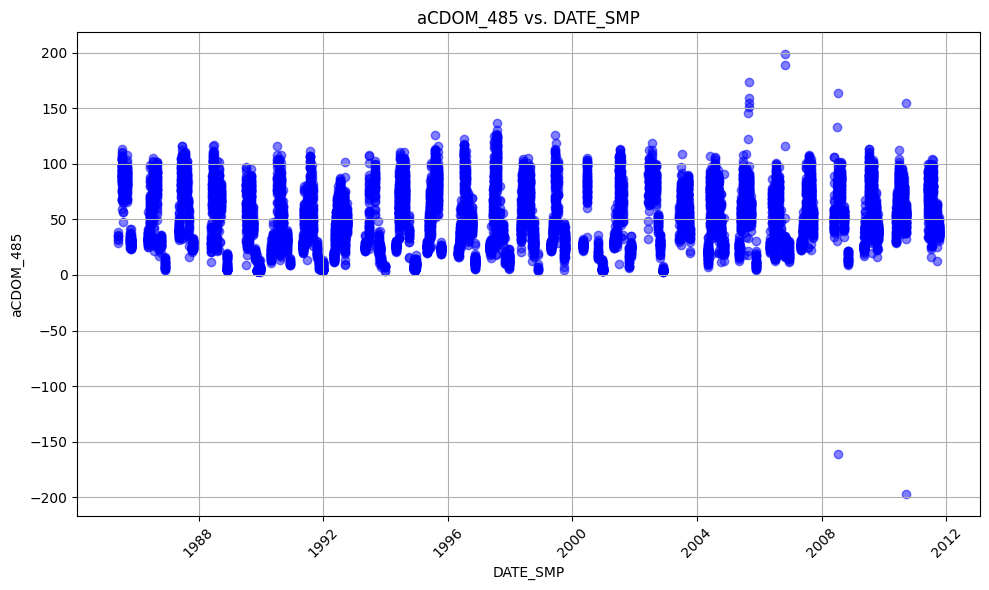

In [58]:
import matplotlib.pyplot as plt

# Plot 'DATE_SMP' against 'aCDOM_485' as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_all_lakes['DATE_SMP'], df_all_lakes['aCDOM_485'], marker='o', color='blue', alpha=0.5)
plt.title('aCDOM_485 vs. DATE_SMP')
plt.xlabel('DATE_SMP')
plt.ylabel('aCDOM_485')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure all labels are visible

# Show the plot
plt.show()


# BIG MOOSE LAKE

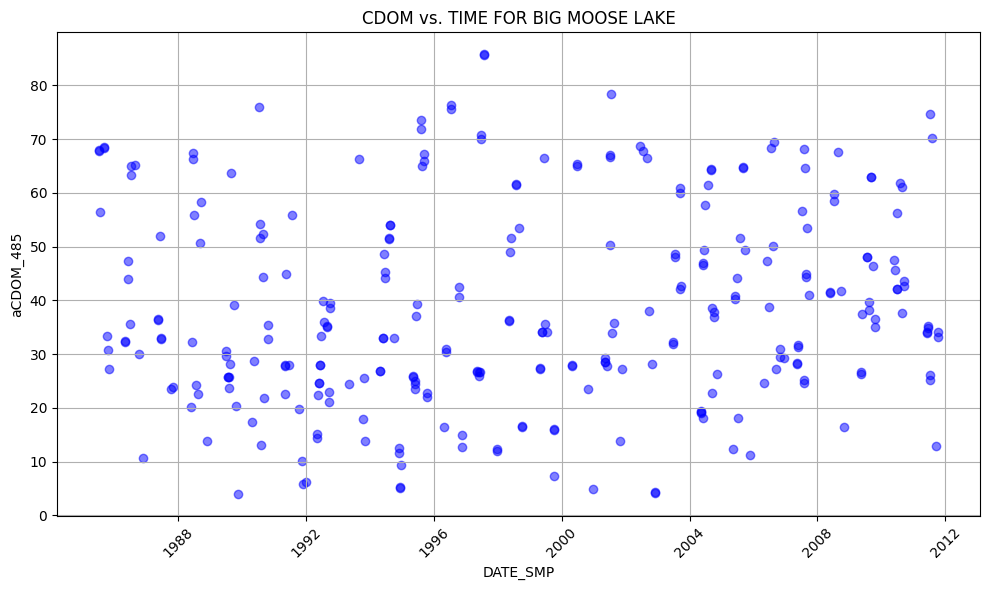

In [59]:
df_plot_BigMOOSELAKE = df_all_lakes[df_all_lakes['SITE_NAME'] == "Big Moose Lake"]
import matplotlib.pyplot as plt

# Plot 'DATE_SMP' against 'aCDOM_485' as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_plot_BigMOOSELAKE['DATE_SMP'], df_plot_BigMOOSELAKE['aCDOM_485'], marker='o', color='blue', alpha=0.5)
plt.title('CDOM vs. TIME FOR BIG MOOSE LAKE')
plt.xlabel('DATE_SMP')
plt.ylabel('aCDOM_485')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure all labels are visible

# Show the plot
plt.show()


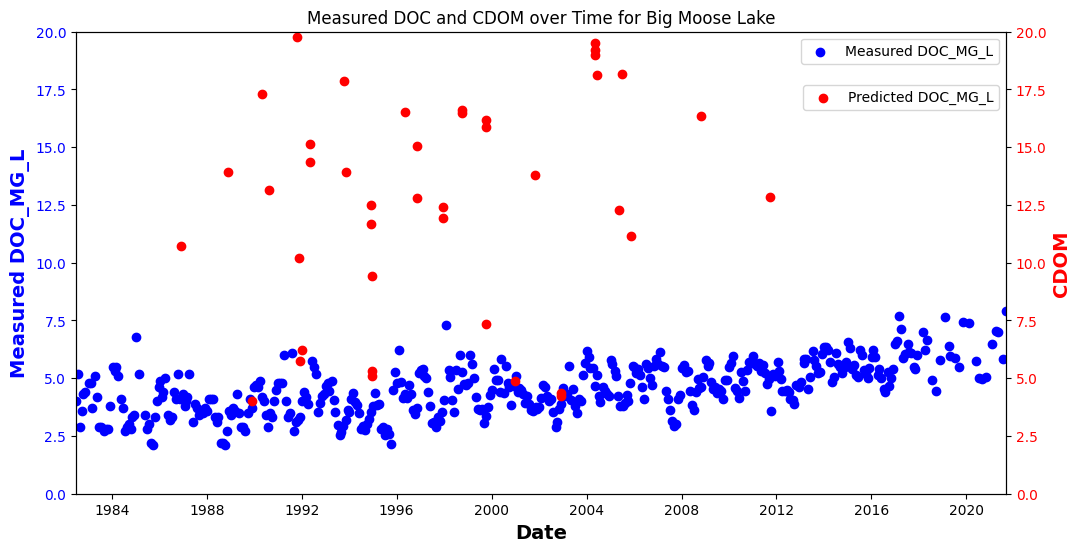

In [60]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

data_modified_BigMOOSELAKE = data_modified[data_modified['SITE_NAME'] == 'Big Moose Lake']

df_plot_BigMOOSELAKE = df_all_lakes[df_all_lakes['SITE_NAME'] == "Big Moose Lake"]

# Plot the measured 'DOC_MG_L' values over the 'DATE_SMP' column on the left y-axis
scatter1 = ax1.scatter(data_modified_BigMOOSELAKE['DATE_SMP'], data_modified_BigMOOSELAKE['DOC_MG_L'], label='Measured DOC_MG_L', color='blue')
ax1.set_xlabel('Date', fontweight='bold', fontsize=14)
ax1.set_ylabel('Measured DOC_MG_L', color='blue', fontweight='bold', fontsize=14)  # Adjust font properties here
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column on the right y-axis
scatter2 = ax2.scatter(df_plot_BigMOOSELAKE['DATE_SMP'], df_plot_BigMOOSELAKE['aCDOM_485'], label='Predicted DOC_MG_L', color='red')
ax2.set_ylabel('CDOM', color='red', fontweight='bold', fontsize=14)  # Adjust font properties here
ax2.tick_params(axis='y', labelcolor='red')

# Set the x-axis limits for both axes to be the same
x_min = min(data_modified_BigMOOSELAKE['DATE_SMP'].min(), df_plot_BigMOOSELAKE['DATE_SMP'].min())
x_max = max(data_modified_BigMOOSELAKE['DATE_SMP'].max(), df_plot_BigMOOSELAKE['DATE_SMP'].max())

ax1.set_xlim(x_min, x_max)
ax2.set_xlim(x_min, x_max)

y_min = 0
y_max = 20

ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# Place the legend at the top-right corner of the plot
ax1.legend(loc='upper right')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

plt.title('Measured DOC and CDOM over Time for Big Moose Lake')
plt.show()



# Lost Pond

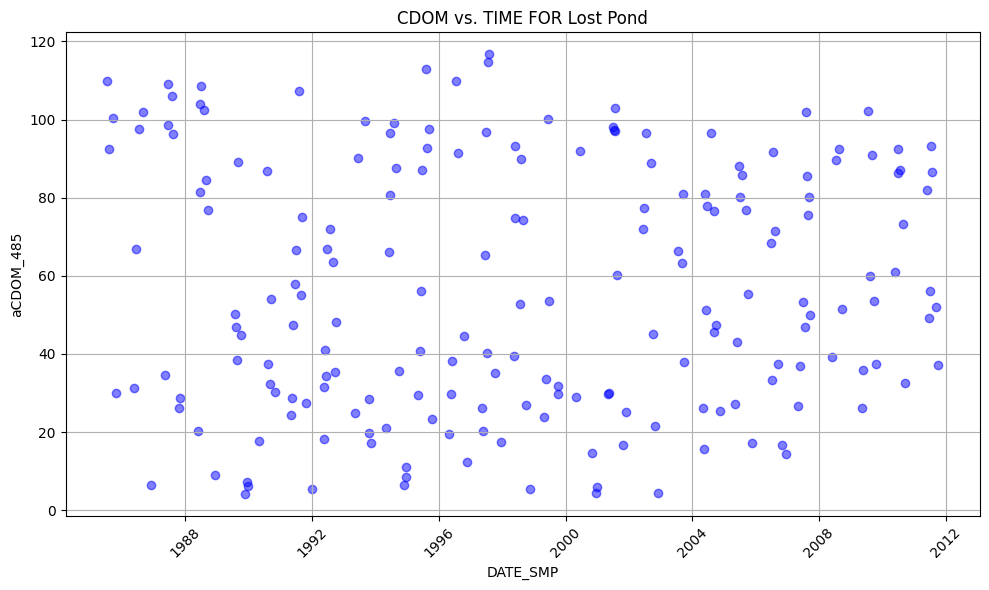

In [61]:
df_plot_BigMOOSELAKE = df_all_lakes[df_all_lakes['SITE_NAME'] == "Lost Pond"]
import matplotlib.pyplot as plt

# Plot 'DATE_SMP' against 'aCDOM_485' as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_plot_BigMOOSELAKE['DATE_SMP'], df_plot_BigMOOSELAKE['aCDOM_485'], marker='o', color='blue', alpha=0.5)
plt.title('CDOM vs. TIME FOR Lost Pond')
plt.xlabel('DATE_SMP')
plt.ylabel('aCDOM_485')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure all labels are visible

# Show the plot
plt.show()


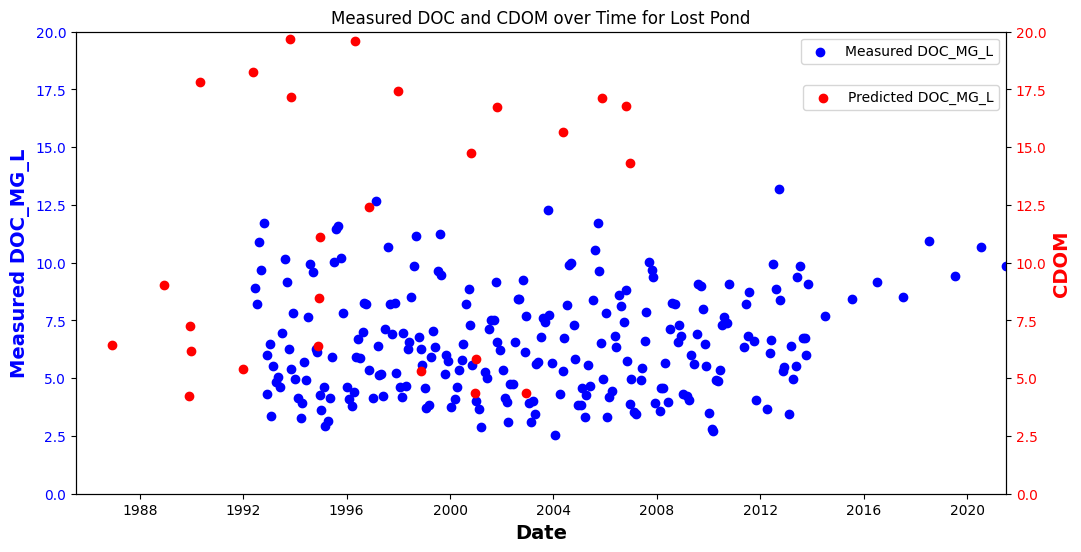

In [62]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

data_modified_BigMOOSELAKE = data_modified[data_modified['SITE_NAME'] == 'Lost Pond']

df_plot_BigMOOSELAKE = df_all_lakes[df_all_lakes['SITE_NAME'] == "Lost Pond"]

# Plot the measured 'DOC_MG_L' values over the 'DATE_SMP' column on the left y-axis
scatter1 = ax1.scatter(data_modified_BigMOOSELAKE['DATE_SMP'], data_modified_BigMOOSELAKE['DOC_MG_L'], label='Measured DOC_MG_L', color='blue')
ax1.set_xlabel('Date', fontweight='bold', fontsize=14)
ax1.set_ylabel('Measured DOC_MG_L', color='blue', fontweight='bold', fontsize=14)  # Adjust font properties here
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column on the right y-axis
scatter2 = ax2.scatter(df_plot_BigMOOSELAKE['DATE_SMP'], df_plot_BigMOOSELAKE['aCDOM_485'], label='Predicted DOC_MG_L', color='red')
ax2.set_ylabel('CDOM', color='red', fontweight='bold', fontsize=14)  # Adjust font properties here
ax2.tick_params(axis='y', labelcolor='red')

# Set the x-axis limits for both axes to be the same
x_min = min(data_modified_BigMOOSELAKE['DATE_SMP'].min(), df_plot_BigMOOSELAKE['DATE_SMP'].min())
x_max = max(data_modified_BigMOOSELAKE['DATE_SMP'].max(), df_plot_BigMOOSELAKE['DATE_SMP'].max())

ax1.set_xlim(x_min, x_max)
ax2.set_xlim(x_min, x_max)

y_min = 0
y_max = 20

ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# Place the legend at the top-right corner of the plot
ax1.legend(loc='upper right')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

plt.title('Measured DOC and CDOM over Time for Lost Pond')
plt.show()



# Arbutus Pond

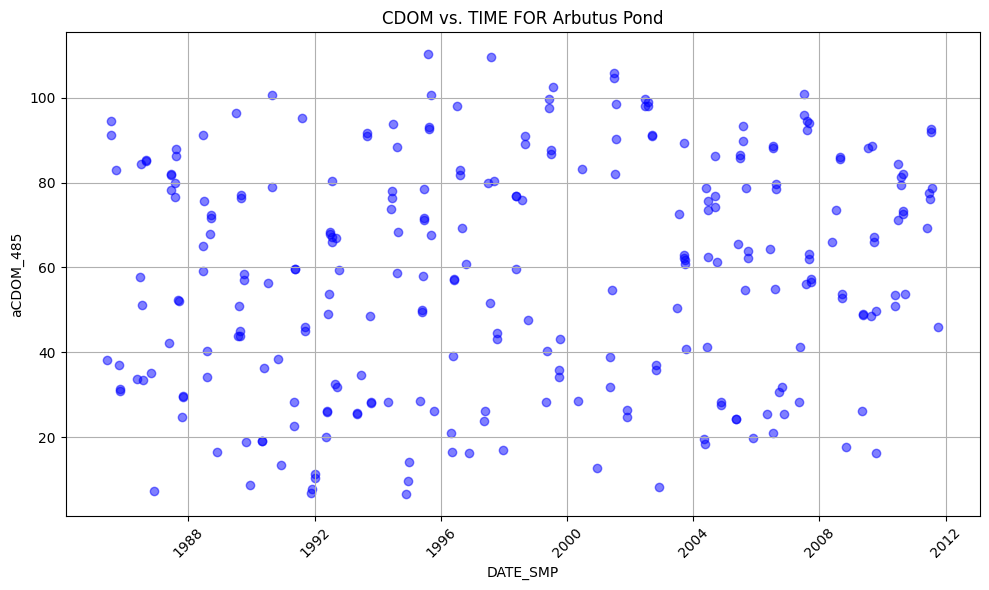

In [63]:
df_plot_BigMOOSELAKE = df_all_lakes[df_all_lakes['SITE_NAME'] == "Arbutus Pond"]
import matplotlib.pyplot as plt

# Plot 'DATE_SMP' against 'aCDOM_485' as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_plot_BigMOOSELAKE['DATE_SMP'], df_plot_BigMOOSELAKE['aCDOM_485'], marker='o', color='blue', alpha=0.5)
plt.title('CDOM vs. TIME FOR Arbutus Pond')
plt.xlabel('DATE_SMP')
plt.ylabel('aCDOM_485')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure all labels are visible

# Show the plot
plt.show()


# Sagamore Lake

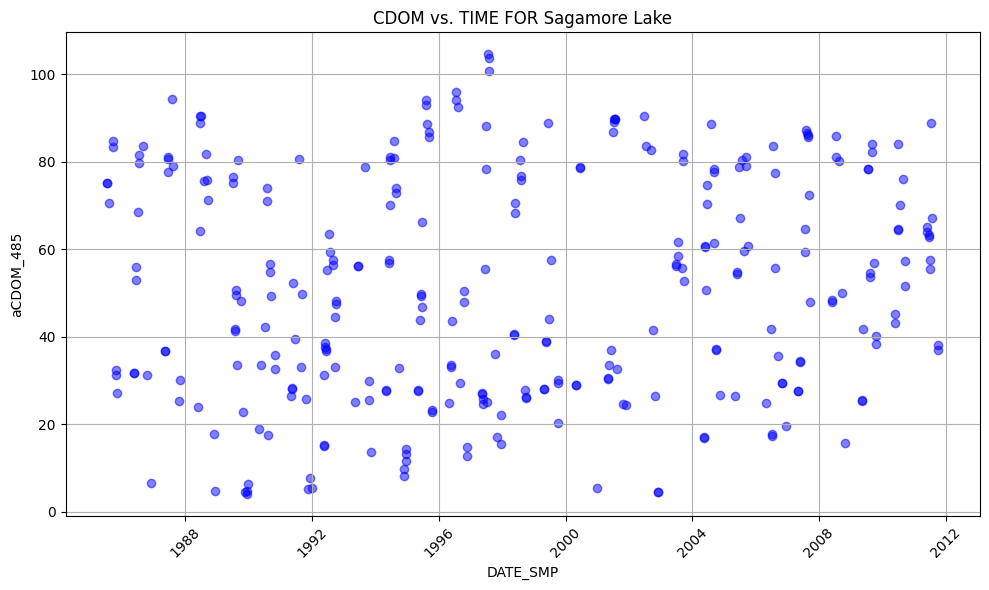

In [64]:
df_plot_BigMOOSELAKE = df_all_lakes[df_all_lakes['SITE_NAME'] == "Sagamore Lake"]
import matplotlib.pyplot as plt

# Plot 'DATE_SMP' against 'aCDOM_485' as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_plot_BigMOOSELAKE['DATE_SMP'], df_plot_BigMOOSELAKE['aCDOM_485'], marker='o', color='blue', alpha=0.5)
plt.title('CDOM vs. TIME FOR Sagamore Lake')
plt.xlabel('DATE_SMP')
plt.ylabel('aCDOM_485')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure all labels are visible

# Show the plot
plt.show()


# Clear Pond

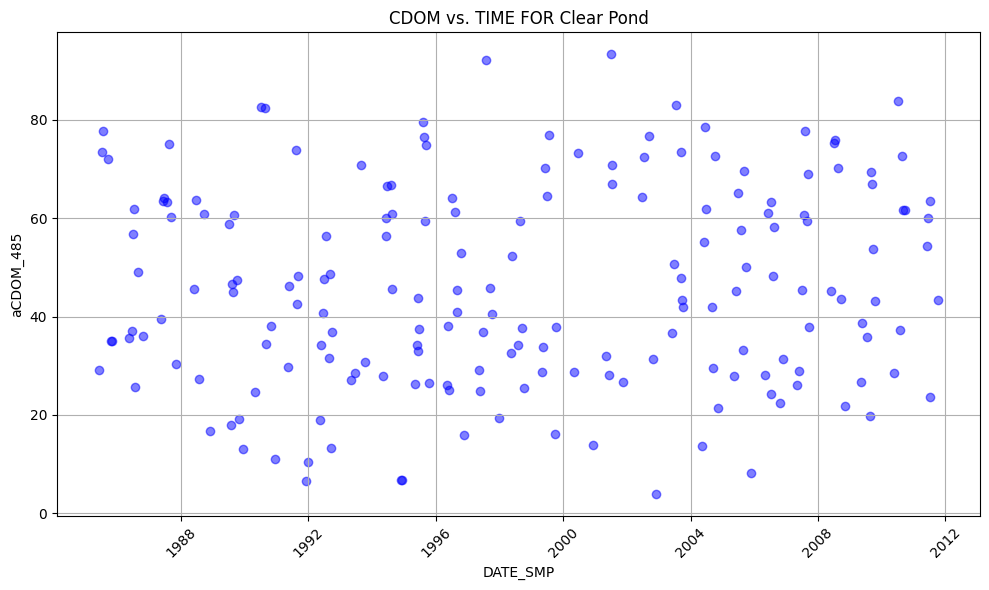

In [65]:
df_plot_BigMOOSELAKE = df_all_lakes[df_all_lakes['SITE_NAME'] == "Clear Pond"]
import matplotlib.pyplot as plt

# Plot 'DATE_SMP' against 'aCDOM_485' as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_plot_BigMOOSELAKE['DATE_SMP'], df_plot_BigMOOSELAKE['aCDOM_485'], marker='o', color='blue', alpha=0.5)
plt.title('CDOM vs. TIME FOR Clear Pond')
plt.xlabel('DATE_SMP')
plt.ylabel('aCDOM_485')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure all labels are visible

# Show the plot
plt.show()


# FOR ALL LAKES

In [66]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor


# Initialize the GradientBoosting
GradientBoostingRegressor_model = GradientBoostingRegressor(random_state=42)

GradientBoostingRegressor_model.fit(X_train, y_train)

# Use the trained model to predict the target variable for the new dataset
predicted_values_all_lakes = GradientBoostingRegressor_model.predict(X_TEST_new)



# Assuming 'DOC_MG_L' is the column where you want to store the predictions in 'df_all_lakes'
df_all_lakes['predicted_DOC'] = predicted_values_all_lakes






import matplotlib.pyplot as plt

# Assuming you already have the 'DATE_SMP' column in 'df_all_lakes' (if not, you can add it back)

# Create a copy of the original DataFrame to avoid modifying the original data
df_plot = df_all_lakes.copy()
# Add the predicted values to the DataFrame
df_plot['predicted_DOC'] = predicted_values_all_lakes

# Sort the DataFrame by 'DATE_SMP'
df_plot.sort_values(by='DATE_SMP', inplace=True)

# Filter only the data for 'Big Moose Lake'
#df_plot = df_plot[df_plot['LAKE_LABEL'] == 34]

# Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column
plt.figure(figsize=(12, 6))
plt.scatter(df_plot['DATE_SMP'], df_plot['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
plt.xlabel('Date')
plt.ylabel('Predicted DOC_MG_L')
# plt.ylim(0,6)
plt.title('Predicted DOC_MG_L over Time for ALL LAKES using GradientBoostingRegressor_model')
plt.legend()
plt.show()


ValueError: Length of values (9788) does not match length of index (10173)

In [ ]:
# pip install geojson


# BIG MOOSE LAKE

In [ ]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor


# Initialize the GradientBoosting
GradientBoostingRegressor_model =  GradientBoostingRegressor(random_state=42)

GradientBoostingRegressor_model.fit(X_train, y_train)

# Use the trained model to predict the target variable for the new dataset
predicted_values_all_lakes = GradientBoostingRegressor_model.predict(X_TEST_new)



# Assuming 'DOC_MG_L' is the column where you want to store the predictions in 'df_all_lakes'
df_all_lakes['predicted_DOC'] = predicted_values_all_lakes






import matplotlib.pyplot as plt

# Assuming you already have the 'DATE_SMP' column in 'df_all_lakes' (if not, you can add it back)

# Create a copy of the original DataFrame to avoid modifying the original data
df_plot = df_all_lakes.copy()
# Add the predicted values to the DataFrame
df_plot['predicted_DOC'] = predicted_values_all_lakes

# Sort the DataFrame by 'DATE_SMP'
df_plot.sort_values(by='DATE_SMP', inplace=True)

# Filter only the data for 'Big Moose Lake'
df_plot_BigMOOSELAKE = df_plot[df_plot['LAKE_LABEL'] == 34]

# Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column
plt.figure(figsize=(12, 6))
plt.scatter(df_plot_BigMOOSELAKE['DATE_SMP'], df_plot_BigMOOSELAKE['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
plt.xlabel('Date')
plt.ylabel('Predicted DOC_MG_L')
# plt.ylim(0,6)
plt.title('Predicted DOC_MG_L over Time for Big Moose Lake using GradientBoostingRegressor_model')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

data_modified_BigMOOSELAKE = data_modified[data_modified['SITE_NAME'] == 'Big Moose Lake']

df_plot_BigMOOSELAKE  = df_plot[df_plot['LAKE_LABEL'] == 34]

# Plot the measured 'DOC_MG_L' values over the 'DATE_SMP' column on the left y-axis
scatter1 = ax1.scatter(data_modified_BigMOOSELAKE['DATE_SMP'], data_modified_BigMOOSELAKE['DOC_MG_L'], label='Measured DOC_MG_L', color='blue')
ax1.set_xlabel('Date', fontweight='bold', fontsize=14)
ax1.set_ylabel('Measured DOC_MG_L', color='blue', fontweight='bold', fontsize=14)  # Adjust font properties here
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column on the right y-axis
scatter2 = ax2.scatter(df_plot_BigMOOSELAKE['DATE_SMP'], df_plot_BigMOOSELAKE['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
ax2.set_ylabel('Predicted DOC_MG_L', color='red', fontweight='bold', fontsize=14)  # Adjust font properties here
ax2.tick_params(axis='y', labelcolor='red')

# Set the x-axis limits for both axes to be the same
x_min = min(data_modified_BigMOOSELAKE['DATE_SMP'].min(), df_plot_BigMOOSELAKE['DATE_SMP'].min())
x_max = max(data_modified_BigMOOSELAKE['DATE_SMP'].max(), df_plot_BigMOOSELAKE['DATE_SMP'].max())

ax1.set_xlim(x_min, x_max)
ax2.set_xlim(x_min, x_max)

y_min = 0
y_max = 20

ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# Place the legend at the top-right corner of the plot
ax1.legend(loc='upper right')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

plt.title('Measured and Predicted DOC_MG_L over Time for Big Moose Lake using GradientBoostingRegressor_model')
plt.show()



In [ ]:
data_modified_BigMOOSELAKE = data_modified[data_modified['SITE_NAME'] == 'Big Moose Lake']

df_plot_BigMOOSELAKE = df_plot[df_plot['LAKE_LABEL'] == 34]

pd.set_option('display.max_rows', None)

df_plot_BigMOOSELAKE

# GET RID OF PREDICTED DOC THAT IS GREATER THAN 8

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

data_modified_BigMOOSELAKE = data_modified[data_modified['SITE_NAME'] == 'Big Moose Lake']

df_plot_BigMOOSELAKE  = df_plot[df_plot['LAKE_LABEL'] == 34]
df_plot_BigMOOSELAKE = df_plot_BigMOOSELAKE[df_plot_BigMOOSELAKE['predicted_DOC'] <= 8]

# Plot the measured 'DOC_MG_L' values over the 'DATE_SMP' column on the left y-axis
scatter1 = ax1.scatter(data_modified_BigMOOSELAKE['DATE_SMP'], data_modified_BigMOOSELAKE['DOC_MG_L'], label='Measured DOC_MG_L', color='blue')
ax1.set_xlabel('Date', fontweight='bold', fontsize=14)
ax1.set_ylabel('Measured DOC_MG_L', color='blue', fontweight='bold', fontsize=14)  # Adjust font properties here
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column on the right y-axis
scatter2 = ax2.scatter(df_plot_BigMOOSELAKE['DATE_SMP'], df_plot_BigMOOSELAKE['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
ax2.set_ylabel('Predicted DOC_MG_L', color='red', fontweight='bold', fontsize=14)  # Adjust font properties here
ax2.tick_params(axis='y', labelcolor='red')

# Set the x-axis limits for both axes to be the same
x_min = min(data_modified_BigMOOSELAKE['DATE_SMP'].min(), df_plot_BigMOOSELAKE['DATE_SMP'].min())
x_max = max(data_modified_BigMOOSELAKE['DATE_SMP'].max(), df_plot_BigMOOSELAKE['DATE_SMP'].max())

ax1.set_xlim(x_min, x_max)
ax2.set_xlim(x_min, x_max)

y_min = 0
y_max = 20

ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# Place the legend at the top-right corner of the plot
ax1.legend(loc='upper right')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

plt.title('Measured and Predicted DOC_MG_L over Time for Big Moose Lake using GradientBoostingRegressor_model')
plt.show()




In [ ]:
data_modified_BigMOOSELAKE = data_modified[data_modified['SITE_NAME'] == 'Big Moose Lake']

df_plot_BigMOOSELAKE = df_plot[df_plot['LAKE_LABEL'] == 34]
df_plot_BigMOOSELAKE = df_plot_BigMOOSELAKE[df_plot_BigMOOSELAKE['predicted_DOC'] <= 8]

pd.set_option('display.max_rows', None)

df_plot_BigMOOSELAKE

# ALL LAKES PREDICTED DOC

In [ ]:
import matplotlib.pyplot as plt

# Assuming you already have the 'DATE_SMP' column in 'df_all_lakes' (if not, you can add it back)

# Get unique lake labels from the 'LAKE_LABEL' column
unique_lake_labels = df_all_lakes['LAKE_LABEL'].unique()

# Loop through unique lake labels
for lake_label in unique_lake_labels:
    # Create a copy of the original DataFrame to avoid modifying the original data
    df_plot = df_all_lakes.copy()
    
    # Add the predicted values to the DataFrame
    df_plot['predicted_DOC'] = predicted_values_all_lakes
    
    # Sort the DataFrame by 'DATE_SMP'
    df_plot.sort_values(by='DATE_SMP', inplace=True)
    
    # Filter the data for the current lake label
    df_plot = df_plot[df_plot['LAKE_LABEL'] == lake_label]
    
    # Get the lake name from the 'SITE_NAME' column
    lake_name = df_plot['SITE_NAME'].iloc[0]  # Assuming the name is the same for all rows of a lake
    
    # Create a separate plot for each lake with the lake name in the title
    plt.figure(figsize=(12, 6))
    plt.scatter(df_plot['DATE_SMP'], df_plot['predicted_DOC'], label=f'Predicted DOC_MG_L ({lake_name})', color='red')
    plt.xlabel('Date')
    plt.ylabel('Predicted DOC_MG_L')
    plt.title(f'Predicted DOC_MG_L over Time for {lake_name} using GradientBoostingRegressor_model')
    plt.legend()
    plt.show()


# ALL LAKES MEASURED AND PREDICTED DOC

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  # Import numpy for handling NaN and Inf values

# Get unique lake names from the 'SITE_NAME' column
unique_lake_names = df_all_lakes['SITE_NAME'].unique()

# Loop through unique lake labels
for lake_name in unique_lake_names:
    # Filter data for the specific lake label
    df_plot = df_all_lakes.copy()
    
    df_plot = df_plot[df_plot['SITE_NAME'] == lake_name]
    df_plot = df_plot[df_plot['predicted_DOC'] <= 8]

    data_modified_lake = data_modified[data_modified['SITE_NAME'] == lake_name]

#     # Check if the data contains NaN or Inf values
#     if data_modified_lake.isnull().values.any() or np.isinf(data_modified_lake['DOC_MG_L'].values).any():
#         print(f"Skipping lake with label {lake_label} due to NaN or Inf values in the data.")
#         continue

    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot the measured 'DOC_MG_L' values over the 'DATE_SMP' column on the left y-axis
    scatter1 = ax1.scatter(data_modified_lake['DATE_SMP'], data_modified_lake['DOC_MG_L'], label='Measured DOC_MG_L', color='blue')
    ax1.set_xlabel('Date', fontweight='bold', fontsize=14)
    ax1.set_ylabel('Measured DOC_MG_L', color='blue', fontweight='bold', fontsize=14)
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a second y-axis on the right side
    ax2 = ax1.twinx()

    # Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column on the right y-axis
    scatter2 = ax2.scatter(df_plot['DATE_SMP'], df_plot['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
    ax2.set_ylabel('Predicted DOC_MG_L', color='red', fontweight='bold', fontsize=14)
    ax2.tick_params(axis='y', labelcolor='red')

    # Set the x-axis limits for both axes to be the same
    x_min = min(data_modified_lake['DATE_SMP'].min(), df_plot['DATE_SMP'].min())
    x_max = max(data_modified_lake['DATE_SMP'].max(), df_plot['DATE_SMP'].max())

    ax1.set_xlim(x_min, x_max)
    ax2.set_xlim(x_min, x_max)

    y_min = 0
    y_max = 20

    ax1.set_ylim(y_min, y_max)
    ax2.set_ylim(y_min, y_max)

    # Place the legend at the top-right corner of the plot
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

    plt.title(f'Measured and Predicted DOC_MG_L over Time for {lake_name} using GradientBoostingRegressor_model')
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  # Import numpy for handling NaN and Inf values

# Get unique lake names from the 'SITE_NAME' column
unique_lake_names = df_all_lakes['SITE_NAME'].unique()

# Create an empty list to store the plotted lake names
plotted_lake_names = []

# Loop through unique lake labels
for lake_name in unique_lake_names:
    # Filter data for the specific lake label
    df_plot = df_all_lakes.copy()
    
    df_plot = df_plot[df_plot['SITE_NAME'] == lake_name]
    data_modified_lake = data_modified[data_modified['SITE_NAME'] == lake_name]
    df_plot = df_plot[df_plot['predicted_DOC'] <= 8]

     # Drop rows with missing values (NaN) in both measured and predicted data
    data_modified_lake = data_modified_lake.dropna(subset=['DOC_MG_L'])
    df_plot = df_plot.dropna(subset=['predicted_DOC'])
    
#     # Check if the data contains NaN or Inf values
#     if data_modified_lake.isnull().values.any() or np.isinf(data_modified_lake['DOC_MG_L'].values).any():
#         print(f"Skipping lake with label {lake_label} due to NaN or Inf values in the data.")
#         continue

    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot the measured 'DOC_MG_L' values over the 'DATE_SMP' column on the left y-axis
    scatter1 = ax1.scatter(data_modified_lake['DATE_SMP'], data_modified_lake['DOC_MG_L'], label='Measured DOC_MG_L', color='blue')
    ax1.set_xlabel('Date', fontweight='bold', fontsize=14)
    ax1.set_ylabel('Measured DOC_MG_L', color='blue', fontweight='bold', fontsize=14)
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a second y-axis on the right side
    ax2 = ax1.twinx()

    # Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column on the right y-axis
    scatter2 = ax2.scatter(df_plot['DATE_SMP'], df_plot['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
    ax2.set_ylabel('Predicted DOC_MG_L', color='red', fontweight='bold', fontsize=14)
    ax2.tick_params(axis='y', labelcolor='red')

    # Set the x-axis limits for both axes to be the same
    x_min = min(data_modified_lake['DATE_SMP'].min(), df_plot['DATE_SMP'].min())
    x_max = max(data_modified_lake['DATE_SMP'].max(), df_plot['DATE_SMP'].max())

    ax1.set_xlim(x_min, x_max)
    ax2.set_xlim(x_min, x_max)

    y_min = 0
    y_max = 20

    ax1.set_ylim(y_min, y_max)
    ax2.set_ylim(y_min, y_max)

    # Place the legend at the top-right corner of the plot
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

    plt.title(f'Measured and Predicted DOC_MG_L over Time for {lake_name} using GradientBoostingRegressor_model')
    plt.show()

    # Append the lake name and lake label to the list of plotted lake names
    plotted_lake_names.append(lake_name)

# Print all the lake names and labels that were plotted
print("Plotted Lake Names:", plotted_lake_names)








In [ ]:
# Find the lake names that were not plotted
not_plotted_lake_names = set(unique_lake_names) - set(plotted_lake_names)

# Print the lake names that were not plotted
print("Lake Names Not Plotted:", list(not_plotted_lake_names))

In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming you already have the 'df_all_lakes' DataFrame with the necessary columns

# # Create a figure and axis
# fig, ax = plt.subplots(figsize=(12, 6))
# unique_lake_names = df_all_lakes['SITE_NAME'].unique()

# for lake_name in unique_lake_names:
#     # Filter data for the specific lake label
#     df_plot = df_all_lakes.copy()
    
#     df_plot = df_plot[df_plot['SITE_NAME'] == lake_name]
#     data_modified_lake = data_modified[data_modified['SITE_NAME'] == lake_name]
    
#      # Drop rows with missing values (NaN) in both measured and predicted data
#     data_modified_lake = data_modified_lake.dropna(subset=['DOC_MG_L'])
#     df_plot = df_plot.dropna(subset=['predicted_DOC'])
    

#     # Plot the measured 'DOC_MG_L' values on the x-axis and predicted 'predicted_DOC' values on the y-axis
#     ax.scatter(data_modified_lake['DOC_MG_L'], df_plot['predicted_DOC'], label=lake_name)

# # Set labels and title
# ax.set_xlabel('Measured DOC_MG_L', fontweight='bold', fontsize=14)
# ax.set_ylabel('Predicted DOC_MG_L', fontweight='bold', fontsize=14)
# plt.title('Scatter Plot of Measured vs. Predicted DOC_MG_L for All Lakes', fontsize=16)

# # Add legend
# ax.legend()

# # Show the plot
# plt.show()


In [ ]:
# import pandas as pd

# # Assuming you have a DataFrame 'df_all_lakes' with columns 'SITE_NAME', 'DATE_SMP', 'DOC_MG_L'
# # and another DataFrame 'data_modified' with columns 'SITE_NAME' and 'predicted_DOC'

# # Convert the 'DATE_SMP' column to datetime if it's not already
# df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])

# # Set the 'DATE_SMP' column as the index for both DataFrames
# df_all_lakes.set_index('DATE_SMP', inplace=True)
# data_modified.set_index('DATE_SMP', inplace=True)

# # Resample the data using a 1-day window and aggregate the values
# df_all_lakes_resampled = df_all_lakes.groupby('SITE_NAME').resample('1D').mean()
# data_modified_resampled = data_modified.groupby('SITE_NAME').resample('1D').mean()

# # Reset the index to make 'SITE_NAME' and 'DATE_SMP' as regular columns
# df_all_lakes_resampled.reset_index(inplace=True)
# data_modified_resampled.reset_index(inplace=True)


# # Now, merged_data contains the merged data with a 1-day window
# # Define the timedelta for the window (1 day in this case)
# window_timedelta = pd.Timedelta(days=1)

# # Merge the two DataFrames using a rolling window
# merged_data = pd.merge_asof(df_all_lakes, data_modified, left_index=True, right_index=True, direction='backward', tolerance=window_timedelta)

In [ ]:
# merged_data

# ALL LAKES LINEAR FIT FOR MEASURED AND PREDICTED DOC

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from datetime import datetime

# List of lake names to include in the plots
# Get unique lake names from the 'SITE_NAME' column
unique_lake_names = df_all_lakes['SITE_NAME'].unique()

# Create an empty list to store the plotted lake names
plotted_lake_names = []

# Loop through the target lake names
for lake_name in unique_lake_names:
    df_plot = df_all_lakes.copy()

    # Filter data for the specific lake name
    df_plot = df_plot[df_plot['SITE_NAME'] == lake_name]
    df_plot = df_plot[df_plot['predicted_DOC'] <= 8]

    data_modified_lake = data_modified[data_modified['SITE_NAME'] == lake_name]

    # Drop rows with missing values (NaN) in both measured and predicted data
    data_modified_lake = data_modified_lake.dropna(subset=['DOC_MG_L'])
    df_plot = df_plot.dropna(subset=['predicted_DOC'])

    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Convert datetime to numeric values (days since the start date)
    start_date = data_modified_lake['DATE_SMP'].min()
    measured_x = (data_modified_lake['DATE_SMP'] - start_date).dt.days
    measured_y = data_modified_lake['DOC_MG_L']

    # Fit linear regression for measured data if there are data points
    if not measured_x.empty and not measured_y.empty:
        measured_regression = LinearRegression().fit(measured_x.values.reshape(-1, 1), measured_y.values.reshape(-1, 1))
        measured_y_pred = measured_regression.predict(measured_x.values.reshape(-1, 1))

        # Plot the measured 'DOC_MG_L' values over the 'DATE_SMP' column on the left y-axis
        scatter1 = ax1.scatter(data_modified_lake['DATE_SMP'], data_modified_lake['DOC_MG_L'], label='Measured DOC_MG_L', color='blue')
        ax1.set_xlabel('Date', fontweight='bold', fontsize=14)
        ax1.set_ylabel('Measured DOC_MG_L', color='blue', fontweight='bold', fontsize=14)
        ax1.tick_params(axis='y', labelcolor='blue')

        # Plot the linear fit line for measured data
        ax1.plot(data_modified_lake['DATE_SMP'], measured_y_pred, color='green', linestyle='--', label='Linear Fit (Measured)',linewidth=4)

    # Create a second y-axis on the right side
    ax2 = ax1.twinx()

    # Convert predicted datetime to numeric
    predicted_x = df_plot['DATE_SMP']
    predicted_y = df_plot['predicted_DOC']
    predicted_x_numeric = (predicted_x - start_date).dt.days

    # Fit linear regression for predicted data if there are data points
    if not predicted_x.empty and not predicted_y.empty:
        predicted_regression = LinearRegression().fit(predicted_x_numeric.values.reshape(-1, 1), predicted_y.values.reshape(-1, 1))
        predicted_y_pred = predicted_regression.predict(predicted_x_numeric.values.reshape(-1, 1))

        # Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column on the right y-axis
        scatter2 = ax2.scatter(predicted_x, df_plot['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
        ax2.set_ylabel('Predicted DOC_MG_L', color='red', fontweight='bold', fontsize=14)
        ax2.tick_params(axis='y', labelcolor='red')

        # Plot the linear fit line for predicted data
        ax2.plot(predicted_x, predicted_y_pred, color='purple', linestyle='--', label='Linear Fit (Predicted)',linewidth=4)

    # Set the x-axis limits for both axes to be the same
    x_min = min(data_modified_lake['DATE_SMP'].min(), df_plot['DATE_SMP'].min())
    x_max = max(data_modified_lake['DATE_SMP'].max(), df_plot['DATE_SMP'].max())

    ax1.set_xlim(x_min, x_max)
    ax2.set_xlim(x_min, x_max)

    y_min = 0
    y_max = 20

    ax1.set_ylim(y_min, y_max)
    ax2.set_ylim(y_min, y_max)

    # Place the legend at the top-right corner of the plot
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

    plt.title(f'Measured and Predicted DOC_MG_L over Time for {lake_name} using GradientBoostingRegressor_model')
    plt.show()
    plotted_lake_names.append(lake_name)

# Print all the lake names and labels that were plotted
print("Plotted Lake Names:", plotted_lake_names)



# TARGET LAKES

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  # Import numpy for handling NaN and Inf values

# List of lake names to include in the plots
target_lake_names = ['Lost Pond', 'Arbutus Pond', 'Sagamore Lake', 'Big Moose Lake', 'Clear Pond']

# Create an empty list to store the plotted lake names
plotted_lake_names = []

# Loop through the target lake names
for lake_name in target_lake_names:
    df_plot = df_all_lakes.copy()

    # Filter data for the specific lake name
    df_plot = df_plot[df_plot['SITE_NAME'] == lake_name]
    df_plot = df_plot[df_plot['predicted_DOC'] <= 8]

    data_modified_lake = data_modified[data_modified['SITE_NAME'] == lake_name]

    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot the measured 'DOC_MG_L' values over the 'DATE_SMP' column on the left y-axis
    scatter1 = ax1.scatter(data_modified_lake['DATE_SMP'], data_modified_lake['DOC_MG_L'], label='Measured DOC_MG_L', color='blue')
    ax1.set_xlabel('Date', fontweight='bold', fontsize=14)
    ax1.set_ylabel('Measured DOC_MG_L', color='blue', fontweight='bold', fontsize=14)
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a second y-axis on the right side
    ax2 = ax1.twinx()

    # Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column on the right y-axis
    scatter2 = ax2.scatter(df_plot['DATE_SMP'], df_plot['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
    ax2.set_ylabel('Predicted DOC_MG_L', color='red', fontweight='bold', fontsize=14)
    ax2.tick_params(axis='y', labelcolor='red')

    # Set the x-axis limits for both axes to be the same
    x_min = min(data_modified_lake['DATE_SMP'].min(), df_plot['DATE_SMP'].min())
    x_max = max(data_modified_lake['DATE_SMP'].max(), df_plot['DATE_SMP'].max())

    ax1.set_xlim(x_min, x_max)
    ax2.set_xlim(x_min, x_max)

    y_min = 0
    y_max = 20

    ax1.set_ylim(y_min, y_max)
    ax2.set_ylim(y_min, y_max)

    # Place the legend at the top-right corner of the plot
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

    plt.title(f'Measured and Predicted DOC_MG_L over Time for {lake_name} using GradientBoostingRegressor_model')
    plt.show()
    plotted_lake_names.append(lake_name)

# Print all the lake names and labels that were plotted
print("Plotted Lake Names:", plotted_lake_names)



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  # Import numpy for handling NaN and Inf values

# List of lake names to include in the plots
target_lake_names = ['Lost Pond', 'Arbutus Pond', 'Sagamore Lake', 'Big Moose Lake', 'Clear Pond']

# Create an empty list to store the plotted lake names
plotted_lake_names = []

# Loop through the target lake names
for lake_name in target_lake_names:
    df_plot = df_all_lakes.copy()

    # Filter data for the specific lake name
    df_plot = df_plot[df_plot['SITE_NAME'] == lake_name]

    data_modified_lake = data_modified[data_modified['SITE_NAME'] == lake_name]

    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot the measured 'DOC_MG_L' values over the 'DATE_SMP' column on the left y-axis
    scatter1 = ax1.scatter(data_modified_lake['DATE_SMP'], data_modified_lake['DOC_MG_L'], label='Measured DOC_MG_L', color='blue')
    ax1.set_xlabel('Date', fontweight='bold', fontsize=14)
    ax1.set_ylabel('Measured DOC_MG_L', color='blue', fontweight='bold', fontsize=14)
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a second y-axis on the right side
    ax2 = ax1.twinx()

    # Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column on the right y-axis
    scatter2 = ax2.scatter(df_plot['DATE_SMP'], df_plot['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
    ax2.set_ylabel('Predicted DOC_MG_L', color='red', fontweight='bold', fontsize=14)
    ax2.tick_params(axis='y', labelcolor='red')

    # Set the x-axis limits for both axes to be the same
    x_min = min(data_modified_lake['DATE_SMP'].min(), df_plot['DATE_SMP'].min())
    x_max = max(data_modified_lake['DATE_SMP'].max(), df_plot['DATE_SMP'].max())

    ax1.set_xlim(x_min, x_max)
    ax2.set_xlim(x_min, x_max)

    y_min = 0
    y_max = 20

    ax1.set_ylim(y_min, y_max)
    ax2.set_ylim(y_min, y_max)

    # Place the legend at the top-right corner of the plot
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

    plt.title(f'Measured and Predicted DOC_MG_L over Time for {lake_name} using GradientBoostingRegressor_model')
    plt.show()
    plotted_lake_names.append(lake_name)

# Print all the lake names and labels that were plotted
print("Plotted Lake Names:", plotted_lake_names)



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  # Import numpy for handling NaN and Inf values

# List of lake names to include in the plots
target_lake_names = ['Lost Pond', 'Arbutus Pond', 'Sagamore Lake', 'Big Moose Lake', 'Clear Pond']

# Create an empty list to store the plotted lake names
plotted_lake_names = []

# Loop through the target lake names
for lake_name in target_lake_names:
    df_plot = df_all_lakes.copy()

    # Filter data for the specific lake name
    df_plot = df_plot[df_plot['SITE_NAME'] == lake_name]
    df_plot = df_plot[df_plot['predicted_DOC'] <= 8]

    data_modified_lake = data_modified[data_modified['SITE_NAME'] == lake_name]

    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot the measured 'DOC_MG_L' values over the 'DATE_SMP' column on the left y-axis
    scatter1 = ax1.scatter(data_modified_lake['DATE_SMP'], data_modified_lake['DOC_MG_L'], label='Measured DOC_MG_L', color='blue')
    ax1.set_xlabel('Date', fontweight='bold', fontsize=14)
    ax1.set_ylabel('Measured DOC_MG_L', color='blue', fontweight='bold', fontsize=14)
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a second y-axis on the right side
    ax2 = ax1.twinx()

    # Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column on the right y-axis
    scatter2 = ax2.scatter(df_plot['DATE_SMP'], df_plot['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
    ax2.set_ylabel('Predicted DOC_MG_L', color='red', fontweight='bold', fontsize=14)
    ax2.tick_params(axis='y', labelcolor='red')

    # Set the x-axis limits for both axes to be the same
    x_min = min(data_modified_lake['DATE_SMP'].min(), df_plot['DATE_SMP'].min())
    x_max = max(data_modified_lake['DATE_SMP'].max(), df_plot['DATE_SMP'].max())

    ax1.set_xlim(x_min, x_max)
    ax2.set_xlim(x_min, x_max)

    y_min = 0
    y_max = 20

    ax1.set_ylim(y_min, y_max)
    ax2.set_ylim(y_min, y_max)

    # Place the legend at the top-right corner of the plot
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

    plt.title(f'Measured and Predicted DOC_MG_L over Time for {lake_name} using GradientBoostingRegressor_model')
    plt.show()
    plotted_lake_names.append(lake_name)

# Print all the lake names and labels that were plotted
print("Plotted Lake Names:", plotted_lake_names)



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from datetime import datetime

# List of lake names to include in the plots
target_lake_names = ['Lost Pond', 'Arbutus Pond', 'Sagamore Lake', 'Big Moose Lake', 'Clear Pond']

# Create an empty list to store the plotted lake names
plotted_lake_names = []

# Loop through the target lake names
for lake_name in target_lake_names:
    df_plot = df_all_lakes.copy()

    # Filter data for the specific lake name
    df_plot = df_plot[df_plot['SITE_NAME'] == lake_name]
    df_plot = df_plot[df_plot['predicted_DOC'] <= 8]

    data_modified_lake = data_modified[data_modified['SITE_NAME'] == lake_name]

    # Drop rows with missing values (NaN) in both measured and predicted data
    data_modified_lake = data_modified_lake.dropna(subset=['DOC_MG_L'])
    df_plot = df_plot.dropna(subset=['predicted_DOC'])

    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Convert datetime to numeric values (days since the start date)
    start_date = data_modified_lake['DATE_SMP'].min()
    measured_x = (data_modified_lake['DATE_SMP'] - start_date).dt.days
    measured_y = data_modified_lake['DOC_MG_L']

    # Fit linear regression for measured data if there are data points
    if not measured_x.empty and not measured_y.empty:
        measured_regression = LinearRegression().fit(measured_x.values.reshape(-1, 1), measured_y.values.reshape(-1, 1))
        measured_y_pred = measured_regression.predict(measured_x.values.reshape(-1, 1))

        # Plot the measured 'DOC_MG_L' values over the 'DATE_SMP' column on the left y-axis
        scatter1 = ax1.scatter(data_modified_lake['DATE_SMP'], data_modified_lake['DOC_MG_L'], label='Measured DOC_MG_L', color='blue')
        ax1.set_xlabel('Date', fontweight='bold', fontsize=14)
        ax1.set_ylabel('Measured DOC_MG_L', color='blue', fontweight='bold', fontsize=14)
        ax1.tick_params(axis='y', labelcolor='blue')

        # Plot the linear fit line for measured data
        ax1.plot(data_modified_lake['DATE_SMP'], measured_y_pred, color='green', linestyle='--', label='Linear Fit (Measured)',linewidth=4)

    # Create a second y-axis on the right side
    ax2 = ax1.twinx()

    # Convert predicted datetime to numeric
    predicted_x = df_plot['DATE_SMP']
    predicted_y = df_plot['predicted_DOC']
    predicted_x_numeric = (predicted_x - start_date).dt.days

    # Fit linear regression for predicted data if there are data points
    if not predicted_x.empty and not predicted_y.empty:
        predicted_regression = LinearRegression().fit(predicted_x_numeric.values.reshape(-1, 1), predicted_y.values.reshape(-1, 1))
        predicted_y_pred = predicted_regression.predict(predicted_x_numeric.values.reshape(-1, 1))

        # Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column on the right y-axis
        scatter2 = ax2.scatter(predicted_x, df_plot['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
        ax2.set_ylabel('Predicted DOC_MG_L', color='red', fontweight='bold', fontsize=14)
        ax2.tick_params(axis='y', labelcolor='red')

        # Plot the linear fit line for predicted data
        ax2.plot(predicted_x, predicted_y_pred, color='purple', linestyle='--', label='Linear Fit (Predicted)',linewidth=4)

    # Set the x-axis limits for both axes to be the same
    x_min = min(data_modified_lake['DATE_SMP'].min(), df_plot['DATE_SMP'].min())
    x_max = max(data_modified_lake['DATE_SMP'].max(), df_plot['DATE_SMP'].max())

    ax1.set_xlim(x_min, x_max)
    ax2.set_xlim(x_min, x_max)

    y_min = 0
    y_max = 20

    ax1.set_ylim(y_min, y_max)
    ax2.set_ylim(y_min, y_max)

    # Place the legend at the top-right corner of the plot
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

    plt.title(f'Measured and Predicted DOC_MG_L over Time for {lake_name} using GradientBoostingRegressor_model')
    plt.show()
    plotted_lake_names.append(lake_name)

# Print all the lake names and labels that were plotted
print("Plotted Lake Names:", plotted_lake_names)



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from datetime import datetime

# List of lake names to include in the plots
target_lake_names = ['Lost Pond', 'Arbutus Pond', 'Sagamore Lake', 'Big Moose Lake', 'Clear Pond']

# Create an empty list to store the plotted lake names
plotted_lake_names = []

# Loop through the target lake names
for lake_name in target_lake_names:
    df_plot = df_all_lakes.copy()

    # Filter data for the specific lake name
    df_plot = df_plot[df_plot['SITE_NAME'] == lake_name]

    data_modified_lake = data_modified[data_modified['SITE_NAME'] == lake_name]

    # Drop rows with missing values (NaN) in both measured and predicted data
    data_modified_lake = data_modified_lake.dropna(subset=['DOC_MG_L'])
    df_plot = df_plot.dropna(subset=['predicted_DOC'])

    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Convert datetime to numeric values (days since the start date)
    start_date = data_modified_lake['DATE_SMP'].min()
    measured_x = (data_modified_lake['DATE_SMP'] - start_date).dt.days
    measured_y = data_modified_lake['DOC_MG_L']

    # Fit linear regression for measured data if there are data points
    if not measured_x.empty and not measured_y.empty:
        measured_regression = LinearRegression().fit(measured_x.values.reshape(-1, 1), measured_y.values.reshape(-1, 1))
        measured_y_pred = measured_regression.predict(measured_x.values.reshape(-1, 1))

        # Plot the measured 'DOC_MG_L' values over the 'DATE_SMP' column on the left y-axis
        scatter1 = ax1.scatter(data_modified_lake['DATE_SMP'], data_modified_lake['DOC_MG_L'], label='Measured DOC_MG_L', color='blue')
        ax1.set_xlabel('Date', fontweight='bold', fontsize=14)
        ax1.set_ylabel('Measured DOC_MG_L', color='blue', fontweight='bold', fontsize=14)
        ax1.tick_params(axis='y', labelcolor='blue')

        # Plot the linear fit line for measured data
        ax1.plot(data_modified_lake['DATE_SMP'], measured_y_pred, color='green', linestyle='--', label='Linear Fit (Measured)',linewidth=4)

    # Create a second y-axis on the right side
    ax2 = ax1.twinx()

    # Convert predicted datetime to numeric
    predicted_x = df_plot['DATE_SMP']
    predicted_y = df_plot['predicted_DOC']
    predicted_x_numeric = (predicted_x - start_date).dt.days

    # Fit linear regression for predicted data if there are data points
    if not predicted_x.empty and not predicted_y.empty:
        predicted_regression = LinearRegression().fit(predicted_x_numeric.values.reshape(-1, 1), predicted_y.values.reshape(-1, 1))
        predicted_y_pred = predicted_regression.predict(predicted_x_numeric.values.reshape(-1, 1))

        # Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column on the right y-axis
        scatter2 = ax2.scatter(predicted_x, df_plot['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
        ax2.set_ylabel('Predicted DOC_MG_L', color='red', fontweight='bold', fontsize=14)
        ax2.tick_params(axis='y', labelcolor='red')

        # Plot the linear fit line for predicted data
        ax2.plot(predicted_x, predicted_y_pred, color='purple', linestyle='--', label='Linear Fit (Predicted)',linewidth=4)

    # Set the x-axis limits for both axes to be the same
    x_min = min(data_modified_lake['DATE_SMP'].min(), df_plot['DATE_SMP'].min())
    x_max = max(data_modified_lake['DATE_SMP'].max(), df_plot['DATE_SMP'].max())

    ax1.set_xlim(x_min, x_max)
    ax2.set_xlim(x_min, x_max)

    y_min = 0
    y_max = 20

    ax1.set_ylim(y_min, y_max)
    ax2.set_ylim(y_min, y_max)

    # Place the legend at the top-right corner of the plot
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

    plt.title(f'Measured and Predicted DOC_MG_L over Time for {lake_name} using GradientBoostingRegressor_model')
    plt.show()
    plotted_lake_names.append(lake_name)

# Print all the lake names and labels that were plotted
print("Plotted Lake Names:", plotted_lake_names)



# SEASONAL TREND

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from datetime import datetime

# List of lake names to include in the plots
target_lake_names = ['Lost Pond', 'Arbutus Pond', 'Sagamore Lake', 'Big Moose Lake', 'Clear Pond']

# Define the seasons and corresponding months
seasons = {
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Fall': [9, 10, 11],
    'Winter': [12, 1, 2]
}

# Loop through the target lake names
for lake_name in target_lake_names:
    df_plot = df_all_lakes.copy()

    # Filter data for the specific lake name
    df_plot = df_plot[df_plot['SITE_NAME'] == lake_name]
    data_modified_lake = data_modified[data_modified['SITE_NAME'] == lake_name]

    # Drop rows with missing values (NaN) in both measured and predicted data
    data_modified_lake = data_modified_lake.dropna(subset=['DOC_MG_L'])
    df_plot = df_plot.dropna(subset=['predicted_DOC'])

    # Create a figure with subplots for each season
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
    fig.suptitle(f'Measured and Predicted DOC_MG_L over Time for {lake_name} by Season', fontsize=16, fontweight='bold')

    for season, months in seasons.items():
        # Filter data for the current season
        season_data_measured = data_modified_lake[data_modified_lake['DATE_SMP'].dt.month.isin(months)]
        season_data_predicted = df_plot[df_plot['DATE_SMP'].dt.month.isin(months)]

        # Convert datetime to numeric values (days since the start date) for the current season
        start_date = season_data_measured['DATE_SMP'].min()
        measured_x = (season_data_measured['DATE_SMP'] - start_date).dt.days
        measured_y = season_data_measured['DOC_MG_L']

        # Fit linear regression for measured data if there are data points
        if not measured_x.empty and not measured_y.empty:
            measured_regression = LinearRegression().fit(measured_x.values.reshape(-1, 1), measured_y.values.reshape(-1, 1))
            measured_y_pred = measured_regression.predict(measured_x.values.reshape(-1, 1))

            # Get the subplot axes for the current season
            if season == 'Spring':
                ax = axes[0, 0]
            elif season == 'Summer':
                ax = axes[0, 1]
            elif season == 'Fall':
                ax = axes[1, 0]
            else:  # Winter
                ax = axes[1, 1]

            # Plot the measured 'DOC_MG_L' values over the 'DATE_SMP' column on the left y-axis
            scatter1 = ax.scatter(season_data_measured['DATE_SMP'], season_data_measured['DOC_MG_L'], label='Measured DOC_MG_L', color='blue')
            ax.set_xlabel('Date', fontweight='bold', fontsize=14)
            ax.set_ylabel('Measured DOC_MG_L', color='blue', fontweight='bold', fontsize=14)
            ax.tick_params(axis='y', labelcolor='blue')

            # Plot the linear fit line for measured data with a thicker line
            ax.plot(season_data_measured['DATE_SMP'], measured_y_pred, color='green', linestyle='--', label='Linear Fit (Measured)', linewidth=2)

            # Add the name of the season to the subplot
            #ax.text(0.7, 0.9, season, transform=ax.transAxes, fontsize=14, fontweight='bold', color='black')

        # Convert predicted datetime to numeric for the current season
        predicted_x = season_data_predicted['DATE_SMP']
        predicted_y = season_data_predicted['predicted_DOC']
        predicted_x_numeric = (predicted_x - start_date).dt.days

        # Fit linear regression for predicted data if there are data points
        if not predicted_x.empty and not predicted_y.empty:
            predicted_regression = LinearRegression().fit(predicted_x_numeric.values.reshape(-1, 1), predicted_y.values.reshape(-1, 1))
            predicted_y_pred = predicted_regression.predict(predicted_x_numeric.values.reshape(-1, 1))

            # Get the subplot axes for the current season
            if season == 'Spring':
                ax = axes[0, 0]
            elif season == 'Summer':
                ax = axes[0, 1]
            elif season == 'Fall':
                ax = axes[1, 0]
            else:  # Winter
                ax = axes[1, 1]

            # Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column on the right y-axis
            scatter2 = ax.scatter(predicted_x, season_data_predicted['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
            ax.set_ylabel('Predicted DOC_MG_L', color='red', fontweight='bold', fontsize=14)
            ax.tick_params(axis='y', labelcolor='red')

            # Plot the linear fit line for predicted data with a thicker line
            ax.plot(predicted_x, predicted_y_pred, color='purple', linestyle='--', label='Linear Fit (Predicted)', linewidth=2)

            # Add the name of the season to the subplot
            ax.text(0.1, 0.9, season, transform=ax.transAxes, fontsize=14, fontweight='bold', color='black')
            
        # Set the x-axis limits for the current season
        x_min = min(season_data_measured['DATE_SMP'].min(), season_data_predicted['DATE_SMP'].min())
        x_max = max(season_data_measured['DATE_SMP'].max(), season_data_predicted['DATE_SMP'].max())

        ax.set_xlim(x_min, x_max)

        y_min = 0
        y_max = 20

        ax.set_ylim(y_min, y_max)

        # Place the legend at the top-right corner of each subplot
        ax.legend(loc='upper right')

    # Adjust spacing between subplots
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from datetime import datetime

# List of lake names to include in the plots
target_lake_names = ['Lost Pond', 'Arbutus Pond', 'Sagamore Lake', 'Big Moose Lake', 'Clear Pond']

# Define the seasons and corresponding months
seasons = {
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Fall': [9, 10, 11],
    'Winter': [12, 1, 2]
}

# Create a dictionary to store the dataframes for each lake
lake_data = {}

# Loop through the target lake names
for lake_name in target_lake_names:
    df_plot = df_all_lakes.copy()

    # Filter data for the specific lake name
    df_plot = df_plot[df_plot['SITE_NAME'] == lake_name]
    data_modified_lake = data_modified[data_modified['SITE_NAME'] == lake_name]

    # Drop rows with missing values (NaN) in both measured and predicted data
    data_modified_lake = data_modified_lake.dropna(subset=['DOC_MG_L'])
    df_plot = df_plot.dropna(subset=['predicted_DOC'])

    # Create empty lists to store data
    measured_dates = []
    measured_values = []
    predicted_dates = []
    predicted_values = []

    # Loop through the seasons
    for season, months in seasons.items():
        # Filter data for the current season
        season_data_measured = data_modified_lake[data_modified_lake['DATE_SMP'].dt.month.isin(months)]
        season_data_predicted = df_plot[df_plot['DATE_SMP'].dt.month.isin(months)]

        # Convert datetime to numeric values (days since the start date) for the current season
        start_date = season_data_measured['DATE_SMP'].min()
        measured_x = (season_data_measured['DATE_SMP'] - start_date).dt.days
        measured_y = season_data_measured['DOC_MG_L']

        # Fit linear regression for measured data if there are data points
        if not measured_x.empty and not measured_y.empty:
            measured_regression = LinearRegression().fit(measured_x.values.reshape(-1, 1), measured_y.values.reshape(-1, 1))
            measured_y_pred = measured_regression.predict(measured_x.values.reshape(-1, 1))

            # Append measured data to the lists
            measured_dates.extend(season_data_measured['DATE_SMP'])
            measured_values.extend(season_data_measured['DOC_MG_L'])
            predicted_dates.extend(season_data_measured['DATE_SMP'])
            predicted_values.extend(measured_y_pred.flatten())

        # Convert predicted datetime to numeric for the current season
        predicted_x = season_data_predicted['DATE_SMP']
        predicted_y = season_data_predicted['predicted_DOC']
        predicted_x_numeric = (predicted_x - start_date).dt.days

        # Fit linear regression for predicted data if there are data points
        if not predicted_x.empty and not predicted_y.empty:
            predicted_regression = LinearRegression().fit(predicted_x_numeric.values.reshape(-1, 1), predicted_y.values.reshape(-1, 1))
            predicted_y_pred = predicted_regression.predict(predicted_x_numeric.values.reshape(-1, 1))

            # Append predicted data to the lists
            measured_dates.extend(season_data_predicted['DATE_SMP'])
            measured_values.extend(season_data_predicted['predicted_DOC'])
            predicted_dates.extend(season_data_predicted['DATE_SMP'])
            predicted_values.extend(predicted_y_pred.flatten())

    # Create a DataFrame for the lake's data
    lake_df = pd.DataFrame({
        'Lake_Name': lake_name,
        'Measured_Date': measured_dates,
        'Measured_DOC_MG_L': measured_values,
        'predicted_DATE': predicted_dates,
        'Predicted_DOC_MG_L': predicted_values
    })

    # Add the lake DataFrame to the dictionary
    lake_data[lake_name] = lake_df

# Access the data for a specific lake like this:
# lake_data['Lake Name']


In [ ]:
lake_data['Big Moose Lake']

In [ ]:
import matplotlib.pyplot as plt

# Define the lake name for which you want to plot the data
lake_name_to_plot = 'Big Moose Lake'

# Get the data for the specified lake
lake_df = lake_data[lake_name_to_plot]

# Extract the relevant columns
measured_dates = lake_df['Measured_Date']
measured_doc = lake_df['Measured_DOC_MG_L']
predicted_dates = lake_df['predicted_DATE']
predicted_doc = lake_df['Predicted_DOC_MG_L']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot measured DOC values
ax.scatter(measured_dates, measured_doc, label='Measured DOC_MG_L', color='blue')

# Plot predicted DOC values
ax.scatter(predicted_dates, predicted_doc, label='Predicted DOC_MG_L', color='red')

# Set labels and title
ax.set_xlabel('Date', fontweight='bold', fontsize=14)
ax.set_ylabel('DOC_MG_L', fontweight='bold', fontsize=14)
ax.set_title(f'Measured vs. Predicted DOC_MG_L for {lake_name_to_plot}', fontsize=16)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [ ]:
lake_data

# Geometry for Big Moose Lakes

In [22]:
entire_lake = ee.FeatureCollection('projects/ee-mazard/assets/adk-samplelakes') \
     .filter(ee.Filter.eq('GNIS_Name', 'Big Moose Lake'))

In [23]:
def lake_label_band(image):
     nir = image.select('SR_B4')
     lake_label = nir.multiply(0).add(34).rename('LAKE_LABEL')
     return image.addBands(lake_label, None, True)
    
    # Extract only the first four bands from the DataFrame
# X_TEST = bands_df.iloc[:, :5]

# # Print the DataFrame
# print(X_TEST) return image.addBands(lake_label, None, True)
    
LC5_BANDS = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'ST_B6', 'QA_PIXEL']
STD_NAMES = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp', 'QA']


new_bands= ['SR_B1','SR_B2','SR_B3','SR_B4','LAKE_LABEL','SR_B5']
STD_NEW= ['blue','green','red','nir','LAKE_LABEL','swir1']

l5_new = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
        .filter(ee.Filter.calendarRange(5, 12, 'month')) \
        .filter(ee.Filter.calendarRange(1985, 2011, 'year')) \
        .filterBounds(lake) \
        .filter(ee.Filter.lt('CLOUD_COVER', 15)) \
        .map(maskL457sr) \
        .map(lake_label_band)\
        .select(new_bands, STD_NEW)

In [24]:
# l5_new= l5.filterBounds(entire_lake)

# GET VALUES FOR THIS CODE

In [25]:
# import ee
# import pandas as pd

# # Authenticate and initialize the Earth Engine API
# ee.Initialize()

# # # ... (Previous code with function definitions and image collections)
# # l5_new = l5.map(lambda img: img.addBands(ee.Image.constant(lake_name_to_label["Big Moose Lake"]).rename('lake_label')))
# # l5_new= l5_new.filterBounds(entire_lake)


# entire_lake = ee.FeatureCollection('projects/ee-mazard/assets/adk-samplelakes') \
#      .filter(ee.Filter.eq('GNIS_Name', 'Big Moose Lake'))

# def get_band_values_as_df(image_collection, band_names, scale=30):
#     # Get the list of dates in the image collection
#     dates = image_collection.aggregate_array('DATE_ACQUIRED').map(lambda t: ee.Date(t).format('YYYY-MM-dd')).getInfo()

#     # Initialize an empty DataFrame
#     bands_df = pd.DataFrame()

#     # Loop through the dates and extract band values for each image
#     for date in dates:
#         # Get the image for the current date
#         image = image_collection.filterMetadata('DATE_ACQUIRED', 'equals', date).first()

#         # Select the specified bands from the image
#         sr_bands = image.select(band_names)

#         # Get the band values as a dictionary
#         bands_dict = sr_bands.reduceRegion(reducer=ee.Reducer.toList(), geometry=entire_lake, scale=scale).getInfo()
#         #use lat and long for the geometry 
        
#         # Convert the dictionary to a DataFrame and add the 'date' column
#         date_df = pd.DataFrame(bands_dict)
#         date_df['date'] = date

#         # Concatenate the DataFrame for the current date with the overall DataFrame
#         bands_df = pd.concat([bands_df, date_df], ignore_index=True)

#     return bands_df

# # Example usage
# # Define the band names you want to extract
# band_names = ['blue','green','red','LAKE_LABEL','nir']

# # Get the band values as a DataFrame
# bands_df = get_band_values_as_df(l5_new, band_names)

# # Print the DataFrame
# print(bands_df)


In [26]:
import ee
import pandas as pd

# Authenticate and initialize the Earth Engine API
ee.Initialize()

# # ... (Previous code with function definitions and image collections)
# l5_new = l5.map(lambda img: img.addBands(ee.Image.constant(lake_name_to_label["Big Moose Lake"]).rename('lake_label')))
# l5_new= l5_new.filterBounds(entire_lake)


entire_lake = ee.FeatureCollection('projects/ee-mazard/assets/adk-samplelakes') \
     .filter(ee.Filter.eq('GNIS_Name', 'Big Moose Lake'))

def get_band_values_as_df(image_collection, band_names, scale=30):
    # Get the list of dates in the image collection
    dates = image_collection.aggregate_array('DATE_ACQUIRED').map(lambda t: ee.Date(t).format('YYYY-MM-dd')).getInfo()

    # Initialize an empty DataFrame
    bands_df = pd.DataFrame()

    # Loop through the dates and extract band values for each image
    for date in dates:
        # Get the image for the current date
        image = image_collection.filterMetadata('DATE_ACQUIRED', 'equals', date).first()

        # Select the specified bands from the image
        sr_bands = image.select(band_names)

        # Get the band values as a dictionary
        bands_dict = sr_bands.reduceRegion(reducer=ee.Reducer.toList(), geometry=entire_lake, scale=scale).getInfo()
        #use lat and long for the geometry 
        
        # Convert the dictionary to a DataFrame and add the 'date' column
        date_df = pd.DataFrame(bands_dict)
        date_df['date'] = date

        # Concatenate the DataFrame for the current date with the overall DataFrame
        bands_df = pd.concat([bands_df, date_df], ignore_index=True)

    return bands_df

# Example usage
# Define the band names you want to extract
band_names = ['LAKE_LABEL', 'blue', 'green', 'nir', 'red']

# Get the band values as a DataFrame
bands_df = get_band_values_as_df(l5_new, band_names)

# Print the DataFrame
print(bands_df)


        LAKE_LABEL      blue     green       nir       red        date
0             34.0  0.033722  0.044035  0.136710  0.055695  1987-10-16
1             34.0  0.024867  0.031633  0.063312  0.034410  1987-10-16
2             34.0  0.027837  0.037848  0.075605  0.023767  1987-10-16
3             34.0  0.033805  0.044063  0.100080  0.029130  1987-10-16
4             34.0  0.036665  0.050140  0.148865  0.050333  1987-10-16
...            ...       ...       ...       ...       ...         ...
483780        34.0  0.018405  0.023108  0.041725  0.020330  2011-10-09
483781        34.0  0.023465  0.023108  0.036857  0.020330  2011-10-09
483782        34.0  0.023465  0.028277  0.100025  0.036857  2011-10-09
483783        34.0  0.023438  0.033447  0.085477  0.028580  2011-10-09
483784        34.0  0.036060  0.043733  0.104892  0.036857  2011-10-09

[483785 rows x 6 columns]


In [27]:
bands_df

,LAKE_LABEL,blue,green,nir,red,date
0,34.0,0.033722,0.044035,0.136710,0.055695,1987-10-16
1,34.0,0.024867,0.031633,0.063312,0.034410,1987-10-16
2,34.0,0.027837,0.037848,0.075605,0.023767,1987-10-16
3,34.0,0.033805,0.044063,0.100080,0.029130,1987-10-16
4,34.0,0.036665,0.050140,0.148865,0.050333,1987-10-16
...,...,...,...,...,...,...
483780,34.0,0.018405,0.023108,0.041725,0.020330,2011-10-09
483781,34.0,0.023465,0.023108,0.036857,0.020330,2011-10-09
483782,34.0,0.023465,0.028277,0.100025,0.036857,2011-10-09
483783,34.0,0.023438,0.033447,0.085477,0.028580,2011-10-09


In [ ]:
entire_lake = ee.FeatureCollection('projects/ee-mazard/assets/adk-samplelakes') \
     .filter(ee.Filter.eq('GNIS_Name', 'Big Moose Lake'))

def get_band_values_as_df(image_collection, band_names, scale=30):
    # Get the list of dates in the image collection
    dates = image_collection.aggregate_array('DATE_ACQUIRED').map(lambda t: ee.Date(t).format('YYYY-MM-dd')).getInfo()

    # Initialize an empty DataFrame
    bands_df = pd.DataFrame()

    # Loop through the dates and extract band values for the entire lake region
    for date in dates:
        # Get the image for the current date
        image = image_collection.filterMetadata('DATE_ACQUIRED', 'equals', date).first()

        # Select the specified bands from the image
        sr_bands = image.select(band_names)

        # Get the band values as a dictionary for the entire lake region
        bands_dict = sr_bands.reduceRegion(reducer=ee.Reducer.mean(), geometry=entire_lake, scale=scale).getInfo()
        
        # Convert the dictionary to a DataFrame row and add the 'date' column
        date_df = pd.DataFrame({band: [bands_dict[band]] for band in band_names})
        date_df['date'] = date

        # Concatenate the DataFrame for the current date with the overall DataFrame
        bands_df = pd.concat([bands_df, date_df], ignore_index=True)

    return bands_df

# Example usage
# Define the band names you want to extract
band_names = ['LAKE_LABEL', 'blue', 'green', 'nir', 'red']

# Get the band values as a DataFrame
bands_df_average = get_band_values_as_df(l5_new, band_names)

# Print the DataFrame
print(bands_df_average)


In [ ]:
# import ee
# import pandas as pd

# # Authenticate and initialize the Earth Engine API
# ee.Initialize()

# # List of lake names
# lake_names = [
#     'Little Hope Pond', 'Big Hope Pond', 'East Copperas Pond', 'Sunday Pond', 'Sochia Pond',
#     'Grass Pond (3)', 'Little Clear Pond', 'Loon Hollow Pond', 'Willys Lake', 'Woods Lake',
#     'Middle Settlement Lake', 'Middle Branch Lake', 'Limekiln Lake', 'Squaw Lake', 'Indian Lake',
#     'Brook Trout Lake', 'Lost Pond', 'North Lake', 'Willis Lake', 'Long Pond', 'Carry Pond',
#     'Lake Colden', 'Avalanche Lake', 'Little Simon Pond', 'Raquette Lake Reservoir', 'G Lake',
#     'Constable Pond', 'Middle Pond', 'Arbutus Pond', 'Sagamore Lake', 'Black Pond', 'Windfall Pond',
#     'Queer Lake', 'Heart Lake', 'Big Moose Lake', 'Cascade Lake', 'Dart Lake', 'Little Echo Pond',
#     'Moss Lake', 'Lake Rondaxe', 'Squash Pond', 'West Pond', 'Owen Pond', 'Jockeybush Lake',
#     'Barnes Lake', 'Clear Pond', 'Otter Lake', 'Nate Pond', 'Grass Pond', 'South Lake (East Branch)'
# ]

# # FeatureCollection for all lakes
# entire_lake = ee.FeatureCollection('projects/ee-mazard/assets/adk-samplelakes')

# def get_band_values_as_df(image_collection, band_names, scale=30):
#     # Initialize an empty list to store DataFrames for each lake
#     lake_dfs = []

#     # Loop through each lake
#     for SITE_NAME in lake_names:
#         # Filter Landsat imagery for the specific lake
#         lake = entire_lake.filter(ee.Filter.eq('GNIS_Name', SITE_NAME))

#         # Get the list of dates in the image collection for this lake
#         dates = image_collection.filterBounds(lake).aggregate_array('DATE_ACQUIRED')\
#             .map(lambda t: ee.Date(t).format('YYYY-MM-dd')).getInfo()

#         # Initialize an empty DataFrame for this lake
#         lake_df = pd.DataFrame()

#         # Loop through the dates and extract band values for each image
#         for date in dates:
#             # Get the image for the current date
#             image = image_collection.filterMetadata('DATE_ACQUIRED', 'equals', date).first()

#             # Select the specified bands from the image
#             sr_bands = image.select(band_names)

#             # Get the band values as a dictionary
#             bands_dict = sr_bands.reduceRegion(
#                 reducer=ee.Reducer.toList(), geometry=lake.geometry(), scale=scale).getInfo()

#             # Add 'date' column to the dictionary
#             bands_dict['date'] = date

#             # Convert the dictionary to a DataFrame
#             date_df = pd.DataFrame(bands_dict)

#             # Concatenate the DataFrame for the current date with the lake's DataFrame
#             lake_df = pd.concat([lake_df, date_df], ignore_index=True)

#         # Add 'SITE_NAME' column to the lake's DataFrame
#         lake_df['SITE_NAME'] = SITE_NAME

#         # Append the lake's DataFrame to the list
#         lake_dfs.append(lake_df)

#     # Concatenate DataFrames for all lakes into one DataFrame
#     return pd.concat(lake_dfs, ignore_index=True)

# # Example usage
# # Define the band names you want to extract
# band_names = ['blue', 'green', 'red', 'nir', 'swir1']

# # Get the band values as a DataFrame for all lakes
# bands_df = get_band_values_as_df(l5_new, band_names)

# # Print the DataFrame
# print(bands_df)


In [ ]:
bands_df

In [ ]:
#bands_df.to_excel(r'C:\Users\Touhe\Downloads\Bands Values with LADD AND LONDD for each station point.xlsx', index=False)


In [ ]:
import pandas as pd

# Assuming 'bands_df' is your original DataFrame with 684914 rows

# Set the random seed for reproducibility
random_seed = 42

# Perform random sampling without replacement to get 9000 rows
sampled_df = bands_df.sample(n=9000, random_state=random_seed)

# Reset the index of the sampled DataFrame
sampled_df.reset_index(drop=True, inplace=True)

# Sort the sampled DataFrame by the 'date' column in ascending order
sampled_df = sampled_df.sort_values(by='date')

# Reset the index of the sorted DataFrame
sampled_df.reset_index(drop=True, inplace=True)



# Print the sampled DataFrame
print(sampled_df)



# Use 1 day window for best accuracy ( 3 and 7 not good like 1 day window)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
data_modified['DATE_SMP'] = pd.to_datetime(data_modified['DATE_SMP'])

data_modified.sort_values('DATE_SMP', inplace=True)
df_all_lakes.sort_values('DATE_SMP', inplace=True)



# Drop the 'nir' band column
# df_all_lakes.drop(columns='nir', inplace=True)

# Display the DataFrame containing reflectance values for all lakes with the new columns
# print(df_all_lakes)


merged_data_all = pd.merge_asof(data_modified, df_all_lakes, on='DATE_SMP', by='SITE_NAME', tolerance=pd.Timedelta(days=1))

# Drop rows where the 'Reflectance' column is null
merged_data_all = merged_data_all.dropna(subset=['blue'])

merged_data_all = merged_data_all.dropna(subset=['DOC_MG_L'])

merged_data_all = merged_data_all[merged_data_all['PROGRAM_ID'] == 'LTM_ALTM']
merged_data_all = merged_data_all.dropna(subset=['LAKE_DEPTH_MEAN'])


# Display the updated DataFrame
# print(merged_data)
merged_data_all


# Preprocessing the 'DATE_SMP' column to extract useful features
merged_data_all['DATE_SMP'] = pd.to_datetime(merged_data_all['DATE_SMP'])  # Convert to datetime if not already done
merged_data_all['year'] = merged_data_all['DATE_SMP'].dt.year
merged_data_all['month'] = merged_data_all['DATE_SMP'].dt.month
merged_data_all['day'] = merged_data_all['DATE_SMP'].dt.day
# merged_data_all['day_of_week'] = merged_data_all['DATE_SMP'].dt.dayofweek

# Drop the original 'DATE_SMP' column as it is no longer needed
merged_data_all = merged_data_all.drop(columns=['DATE_SMP'])


# Filter the data for only the Arbutus Pond' lake_label
#merged_data_all = merged_data_all[merged_data_all['SITE_NAME'] == 'Big Moose Lake']

# merged_data_all = merged_data_all[(merged_data_all['month'] == 9) | (merged_data_all['month'] == 10)]


# Preparing the training data for 'Arbutus Pond' lake_label
X = merged_data_all[['LAKE_LABEL', 'blue', 'green', 'nir', 'red']]  # Features
y = merged_data_all['DOC_MG_L']  # Target variable

# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_all.groupby('LAKE_LABEL')

min_samples = 3  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['LAKE_LABEL', 'blue', 'green', 'nir', 'red']]
    y_lake = lake_group['DOC_MG_L']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# WITH LAKE LABEL AS FEATURES 1 day window/n')
print(evaluation_df_all)

In [ ]:
# Drop rows with NaN values
bands_df_average.dropna(inplace=True)

# Reset the index after dropping rows
bands_df_average.reset_index(drop=True, inplace=True)

# Print the DataFrame
#print(bands_df_average)

In [ ]:
# Extract only the first four bands from the DataFrame
X_TEST = bands_df.iloc[:, :5]

# Print the DataFrame
print(X_TEST)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor


# Initialize the GradientBoosting
RandomForestRegressor_model =  RandomForestRegressor(random_state=42)

RandomForestRegressor_model.fit(X_train, y_train)

# Use the trained model to predict the target variable for the new dataset
predicted_values_all_lakes = RandomForestRegressor_model.predict(X_TEST)



# Assuming 'DOC_MG_L' is the column where you want to store the predictions in 'df_all_lakes'
bands_df['predicted_DOC'] = predicted_values_all_lakes






import matplotlib.pyplot as plt

# Assuming you already have the 'DATE_SMP' column in 'df_all_lakes' (if not, you can add it back)

# Create a copy of the original DataFrame to avoid modifying the original data
df_plot = bands_df.copy()
# Add the predicted values to the DataFrame
df_plot['predicted_DOC'] = predicted_values_all_lakes

# Sort the DataFrame by 'DATE_SMP'
df_plot.sort_values(by='date', inplace=True)

# Filter only the data for 'Big Moose Lake'
#df_plot = df_plot[df_plot['LAKE_LABEL'] == 34]

# Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column
plt.figure(figsize=(12, 6))
plt.scatter(df_plot['date'], df_plot['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
plt.xlabel('Date')
plt.ylabel('Predicted DOC_MG_L')
# plt.ylim(0,6)
plt.title('Predicted DOC_MG_L over Time for Big Moose Lake using RandomForestRegressor_model')
plt.legend()
plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

# # Assuming you already have the 'DATE_SMP' column in 'df_all_lakes' (if not, you can add it back)

# # Filter only the data for 'Big Moose Lake'
# # df_plot = df_plot[df_plot['LAKE_LABEL'] == 34]

# # Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column
# plt.figure(figsize=(12, 6))
# plt.scatter(df_plot['date'], df_plot['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
# plt.xlabel('Date')
# plt.ylabel('Predicted DOC_MG_L')
# # plt.ylim(0, 6)
# plt.title('Predicted DOC_MG_L over Time for Big Moose Lake using AdaBoostRegressor_model')

# # Format the x-axis dates to display only the years
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# # Rotate the x-axis date labels for better visibility
# plt.gca().xaxis.set_major_locator(mdates.YearLocator())
# plt.xticks(rotation=45)

# plt.legend()
# plt.tight_layout()
# plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming you already have the 'DATE_SMP' column in 'df_all_lakes' (if not, you can add it back)

# Filter only the data for 'Big Moose Lake'
# df_plot = df_plot[df_plot['LAKE_LABEL'] == 34]

# Convert the 'date' column to pandas datetime object with the correct format
df_plot['date'] = pd.to_datetime(df_plot['date'], format='%Y-%m-%d')

# Plot the predicted 'DOC_MG_L' values over the 'date' column
plt.figure(figsize=(12, 6))
plt.scatter(df_plot['date'], df_plot['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
plt.xlabel('Date')
plt.ylabel('Predicted DOC_MG_L')
# plt.ylim(0, 6)
plt.title('Predicted DOC_MG_L over Time for Big Moose Lake using RandomForestRegressor_model')

# Format the x-axis dates to display only the years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate the x-axis date labels for better visibility
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Rename the 'DATE_SMP' column to 'date' in data_modified DataFrame
data_modified.rename(columns={'DATE_SMP': 'date'}, inplace=True)

# Assuming you have a DataFrame 'original_df' that contains the original 'DOC_MG_L' values and 'date' column
# Merge the original 'DOC_MG_L' values with the 'df_plot' DataFrame based on the 'date' column
filtered_data = data_modified[data_modified['SITE_NAME'] == 'Big Moose Lake'][['date', 'DOC_MG_L']]

merged_df = df_plot.merge(filtered_data[['date', 'DOC_MG_L']], on='date', how='inner')

# Create subplots with twinx for overlaying original and predicted values on two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot original 'DOC_MG_L' values (blue)
ax1.scatter(merged_df['date'], merged_df['DOC_MG_L'], label='Original DOC_MG_L', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Original DOC_MG_L', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  # Create a second y-axis that shares the same x-axis

# Plot predicted 'DOC_MG_L' values (red)
ax2.scatter(merged_df['date'], merged_df['predicted_DOC'], label='Predicted DOC_MG_L', color='red', alpha=0.7)
ax2.set_ylabel('Predicted DOC_MG_L', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title and legend
plt.title('Original vs. Predicted DOC_MG_L over Time for Big Moose Lake')
plt.legend(loc='upper left')

plt.grid(True)
plt.show()


In [ ]:
# # Assuming df_plot has already been created as described in the previous code

# # Extract only the 'predicted_DOC' values for Big Moose Lake
# predicted_doc_values_big_moose_lake = df_plot[df_plot['LAKE_LABEL'] == 34]['predicted_DOC']

# # If you want to store the predicted 'DOC_MG_L' values in a separate variable, you can do the following:
# # predicted_doc_values = predicted_doc_values_big_moose_lake.values

# # Print or use the predicted 'DOC_MG_L' values as needed
# print(predicted_doc_values_big_moose_lake)


In [ ]:
#This is for the map

import pandas as pd

# Assuming df_plot has already been created as described in the previous code

# Extract only the 'predicted_DOC' values for Big Moose Lake
predicted_doc_values_big_moose_lake = merged_df[['date', 'predicted_DOC','DOC_MG_L']]

# Convert the 'date' column to pandas datetime object
predicted_doc_values_big_moose_lake['date'] = pd.to_datetime(predicted_doc_values_big_moose_lake['date'])

# Print the DataFrame with the predicted 'DOC_MG_L' values and corresponding dates
print(predicted_doc_values_big_moose_lake)


In [ ]:
#pd.set_option('display.max_rows', None)
predicted_doc_values_big_moose_lake

In [ ]:
import matplotlib.pyplot as plt

# Create subplots with twinx for overlaying predicted_DOC and DOC_MG_L values on two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot predicted_DOC values (red)
ax1.plot(predicted_doc_values_big_moose_lake['date'], predicted_doc_values_big_moose_lake['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Predicted DOC_MG_L', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()  # Create a second y-axis that shares the same x-axis

# Plot DOC_MG_L values (blue)
ax2.plot(predicted_doc_values_big_moose_lake['date'], predicted_doc_values_big_moose_lake['DOC_MG_L'], label='Original DOC_MG_L', color='blue', alpha=0.7)
ax2.set_ylabel('Original DOC_MG_L', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add a title and legend
plt.title('Predicted and Original DOC_MG_L over Time for Big Moose Lake')
plt.legend(loc='upper left')

plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Create subplots with twinx for overlaying predicted_DOC and DOC_MG_L values on two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot predicted_DOC values (red)
ax1.scatter(predicted_doc_values_big_moose_lake['date'], predicted_doc_values_big_moose_lake['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Predicted DOC_MG_L', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()  # Create a second y-axis that shares the same x-axis

# Plot DOC_MG_L values (blue)
ax2.scatter(predicted_doc_values_big_moose_lake['date'], predicted_doc_values_big_moose_lake['DOC_MG_L'], label='Original DOC_MG_L', color='blue', alpha=0.7)
ax2.set_ylabel('Original DOC_MG_L', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add a title and legend
plt.title('Predicted and Original DOC_MG_L over Time for Big Moose Lake')
plt.legend(loc='upper left')

plt.grid(True)
plt.show()


In [ ]:
l5 = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
        .filter(ee.Filter.calendarRange(5, 12, 'month')) \
        .filter(ee.Filter.calendarRange(1985, 2011, 'year')) \
        .filterBounds(lake) \
        .filter(ee.Filter.lt('CLOUD_COVER', 15)) \
        .map(maskL457sr) \
        .select(LC5_BANDS, STD_NAMES)

In [ ]:
#ee.Authenticate()
# Extract the first image
first_image = l5.first()
 
# Display band information about the image
first_image.bandNames().getInfo()

In [ ]:
# first_image = collection.first()
 
# # Get number of years after 1991 from the first image
# year = ee.Date(first_image.get('system:time_start')).get('year').subtract(1991)
 
# # Turn it into a band
# img1 = ee.Image(year).byte().addBands(first_image)
 
# # A new band appears in the new image
# img1.bandNames().getInfo()

In [ ]:
import ee

# Initialize Earth Engine
ee.Initialize()

# Load the entire lake geometry
entire_lake = ee.FeatureCollection('projects/ee-mazard/assets/adk-samplelakes') \
    .filter(ee.Filter.eq('GNIS_Name', 'Big Moose Lake'))

# Assuming you have latitude and longitude columns in the DataFrame
def create_point_feature(row):
    # Create a point geometry from latitude and longitude
    geometry= ee.FeatureCollection('projects/ee-mazard/assets/adk-samplelakes') \
    .filter(ee.Filter.eq('GNIS_Name', 'Big Moose Lake'))

    # Create a feature with geometry and properties
    feature = ee.Feature(geometry, {
        'date': row['date'].isoformat(),  # Convert date to ISO format
        'predicted_DOC': row['predicted_DOC']
    })
    
    return feature

# Convert the DataFrame to a list of features
features = predicted_doc_values_big_moose_lake.apply(create_point_feature, axis=1).tolist()

# Create a FeatureCollection from the list of features
fc = ee.FeatureCollection(features)

# Set the geometry of the FeatureCollection to the entire lake geometry
fc = fc.set('geometry', entire_lake.geometry())

# Print the FeatureCollection
#print(fc.getInfo())


In [ ]:



import ee
import folium

# Initialize Earth Engine
ee.Initialize()

# Load your FeatureCollection
# Replace 'your_asset_id' with the actual asset ID of your FeatureCollection
fc = ee.FeatureCollection('projects/ee-mazard/assets/adk-samplelakes') \
    .filter(ee.Filter.eq('GNIS_Name', 'Big Moose Lake'))
# Define a function to style the features based on 'predicted_DOC' values
def style_function(feature):
    doc_value = ee.Number(feature.get('predicted_DOC'))
    return {
        'color': 'red' if doc_value.gt(10) else 'green',  # Use .gt() for greater than
        'fillOpacity': 0.5,
    }

# Apply the style function to the FeatureCollection
fc = fc.map(lambda feature: feature.set(style_function(feature)))

# Create a map centered on Big Moose Lake
map_center = [43.81881397847559, -74.88021691203394]
m = folium.Map(location=map_center, zoom_start=13)

# Convert the Earth Engine FeatureCollection to a GeoJSON
fc_geojson = fc.getInfo()

# Add GeoJSON to the map with the defined style function
folium.GeoJson(
    fc_geojson,
    style_function=lambda feature: {
        'fillColor': feature['properties']['color'],  # Set fill color based on style function
        'fillOpacity': feature['properties']['fillOpacity']
    }
).add_to(m)

# Display the map
m


In [ ]:
import geemap
import ee

# Create a color palette for visualization
palette = ['000000', '0000FF', '00FF00', 'FFFF00', 'FF0000']

# Initialize Earth Engine
ee.Initialize()

# Load the FeatureCollection (fc) that you created earlier
# Assuming you have the 'fc' FeatureCollection as created in previous responses

# Define a function to add the FeatureCollection as a band to each image in the collection
def addFeatureCollectionAsBand(image):
    # Convert the FeatureCollection to an image
    fc_image = fc.reduceToImage(properties=['predicted_DOC'], reducer=ee.Reducer.first())

    # Add the FeatureCollection image as a new band to the input image
    image_with_band = image.addBands(fc_image)

    return image_with_band

# Load the Landsat 5 ImageCollection and apply the filtering operations
l5 = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
    .filter(ee.Filter.calendarRange(5, 12, 'month')) \
    .filter(ee.Filter.calendarRange(1985, 2011, 'year')) \
    .filterBounds(lake) \
    .filter(ee.Filter.lt('CLOUD_COVER', 15)) \
    .map(maskL457sr) \
    .select(LC5_BANDS, STD_NAMES)

# Map the function over the ImageCollection to add the FeatureCollection as a band
l5_with_band = l5.map(addFeatureCollectionAsBand)

# Get the first image from the collection
first_image = l5_with_band.first()

# Apply a color palette to the 'first' band
vis_params = {
    'min': 0,
    'max': 0.1,
    'palette': palette
}

# Create a Map object
doc_map = geemap.Map(center=[43.82520180, -74.86152861], zoom=10)

# Display the 'first' band with the color palette
doc_map.add_ee_layer(first_image.select('blue').visualize(**vis_params), {}, 'Predicted DOC Concentration')

# Display the map
doc_map
